# Data analysis of breast cancer patients

Breast cancer is the most frequent cancer among women all over the world. In 2020, 2.3 million women will be diagnosed with breast cancer, with 685 000 deaths worldwide. Breast cancer had been diagnosed in 7.8 million women in the previous five years as of 2020, making it the most common cancer in the world. It is more common in women, with men accounting for about 0.5-1 percent of all breast cancer cases.

In the glandular tissue of the breast, breast cancer develops in the lining cells (epithelium) of the ducts (85%) or lobules (15%). The malignant development is initially restricted to the duct or lobule ("in situ"), where it usually causes no symptoms and has a low risk of spreading (metastasis).

Breast cancer is the most frequent cancer in the United Kingdom. Breast cancer is most commonly diagnosed in women over the age of 50, although it can also strike younger women. Breast cancer affects about 1 in every 8 women at some point in their lives. If it's caught early enough, there's a decent chance of recovery.

The most frequent kind of breast cancer is infiltrating ductal carcinoma, which is followed by infiltrating lobular carcinoma. Mucinous carcinoma is one of several other, far rarer kinds of cancer.



<h3>What are the symptoms of breast cancer?</h3>
<p>
Signs and symptoms of breast cancer may include:

- A breast lump or thickening that feels different from the surrounding tissue

- Change in the size, shape or appearance of a breast

- Changes to the skin over the breast, such as dimpling
    
- A newly inverted nipple
    
- Peeling, scaling, crusting or flaking of the pigmented area of skin surrounding the nipple (areola) or breast skin
    
- Redness or pitting of the skin over your breast, like the skin of an orange
</p>

This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:

## Features

- Patient_ID: unique identifier id of a patient
- Age: age at diagnosis (Years)
- Gender: Male/Female
- Protein1, Protein2, Protein3, Protein4: expression levels (undefined units)
- Tumour_Stage: I, II, III
- Histology: Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma
- ER status: Positive/Negative
- PR status: Positive/Negative
- HER2 status: Positive/Negative
- Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
- DateofSurgery: Date on which surgery was performed (in DD-MON-YY) DateofLast_Visit: Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visited again after the surgery]
- DateofLast_Visit: Date of last visit (in DD-MON-YY),can be null, in case the patient didn’t visited again after the surgery.
- Patient_Status: Alive/Dead ,can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead.

## Data Description

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import plotly.figure_factory as ff

import seaborn as sns

In [98]:
#pip install plotly

In [88]:
BRC = pd.read_csv('DataSet.csv')

In [89]:
BRC.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [90]:
BRC.shape

(341, 16)

In [91]:
BRC.dropna(inplace = True)

In [93]:
BRC.shape

(317, 16)

In [94]:
BRC.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [95]:
print('The variables of the dataset are:\n')
for i in BRC.columns:
    print('-', i)

The variables of the dataset are:

- Patient_ID
- Age
- Gender
- Protein1
- Protein2
- Protein3
- Protein4
- Tumour_Stage
- Histology
- ER status
- PR status
- HER2 status
- Surgery_type
- Date_of_Surgery
- Date_of_Last_Visit
- Patient_Status


## Aim

# Resampling

Resampling is a method for economically using a data sample to improve the accuracy and quantify the uncertainty of a population parameter. It consists of removing samples from the majority class or adding more examples from the minority class.

Despite the advantage of balancing classes, these techniques also have their weaknesses. The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example, which uses the <code>DataFrame.sample</code> method to get random samples each class:

In [103]:
# Class count
count_class0, count_class1 = df['Patient_Status'].value_counts()

# Divide by class
df_class0 = df[df['Patient_Status'] == 'Alive']
df_class1 = df[df['Patient_Status'] == 'Dead']

print(count_class0)
print(count_class1)

255
62


In [108]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,Dead
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead


Random under-sampling:
Alive    62
Dead     62
Name: Patient_Status, dtype: int64


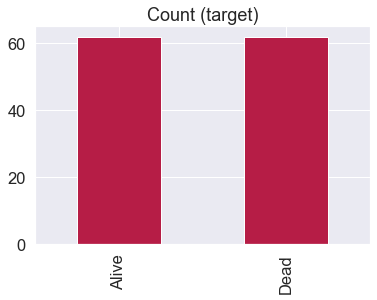

In [105]:
df_class0_plus = df_class_0.sample(count_class_1,random_state=42)
df_plus = pd.concat([df_class0_plus, df_class1], axis=0)

print('Random under-sampling:')
print(df_plus['Patient_Status'].value_counts())

df_plus['Patient_Status'].value_counts().plot(kind='bar', title='Count (target)');

## Categorical Features

Here we are describing the data type and visualizing the categorical features of this dataset.

In [107]:
for column  in df.select_dtypes("object"):
    print(f'{column :-<50} {df[column].unique()}')

Gender-------------------------------------------- ['FEMALE' 'MALE']
Tumour_Stage-------------------------------------- ['III' 'II' 'I']
Histology----------------------------------------- ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
ER status----------------------------------------- ['Positive']
PR status----------------------------------------- ['Positive']
HER2 status--------------------------------------- ['Negative' 'Positive']
Surgery_type-------------------------------------- ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
Patient_Status------------------------------------ ['Alive' 'Dead']


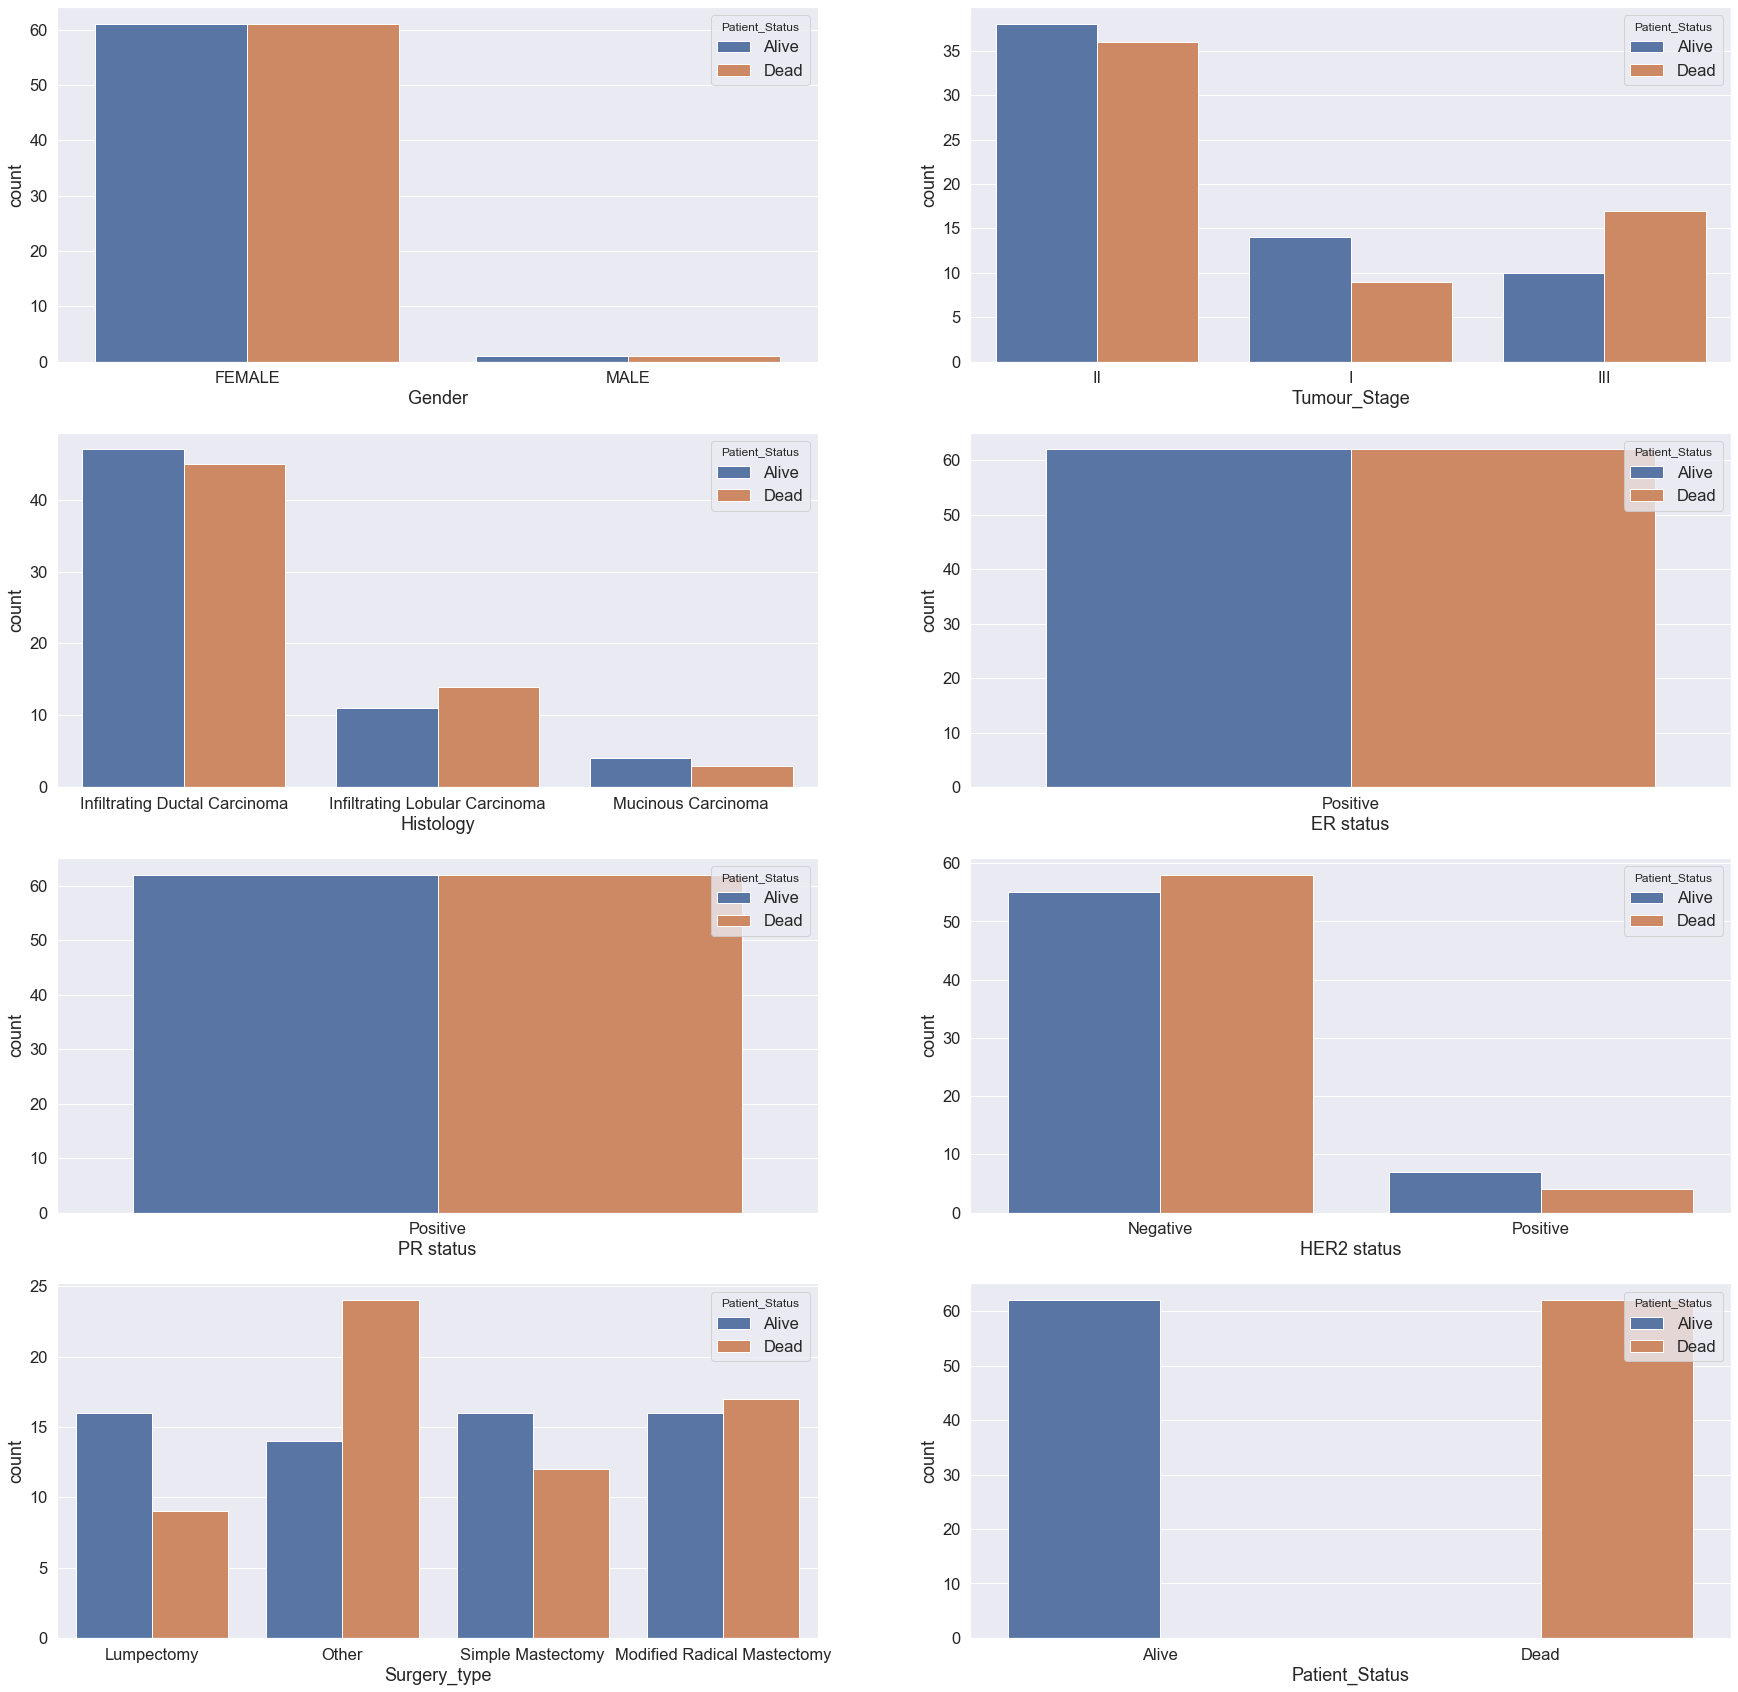

In [28]:
fig, ax = plt.subplots(4,2, figsize=(30, 30))
k=0
sns.set(font_scale = 1.5)
for column in df.select_dtypes('object'): 
    sns.countplot(df_plus[column], hue=df_plus['Patient_Status'], ax=ax[k//2][k%2])
    k=k+1
plt.show()

## Continuous Features

Here we are visualizing the continuous features of our dataset.

<ipython-input-109-35a818ae6b75>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



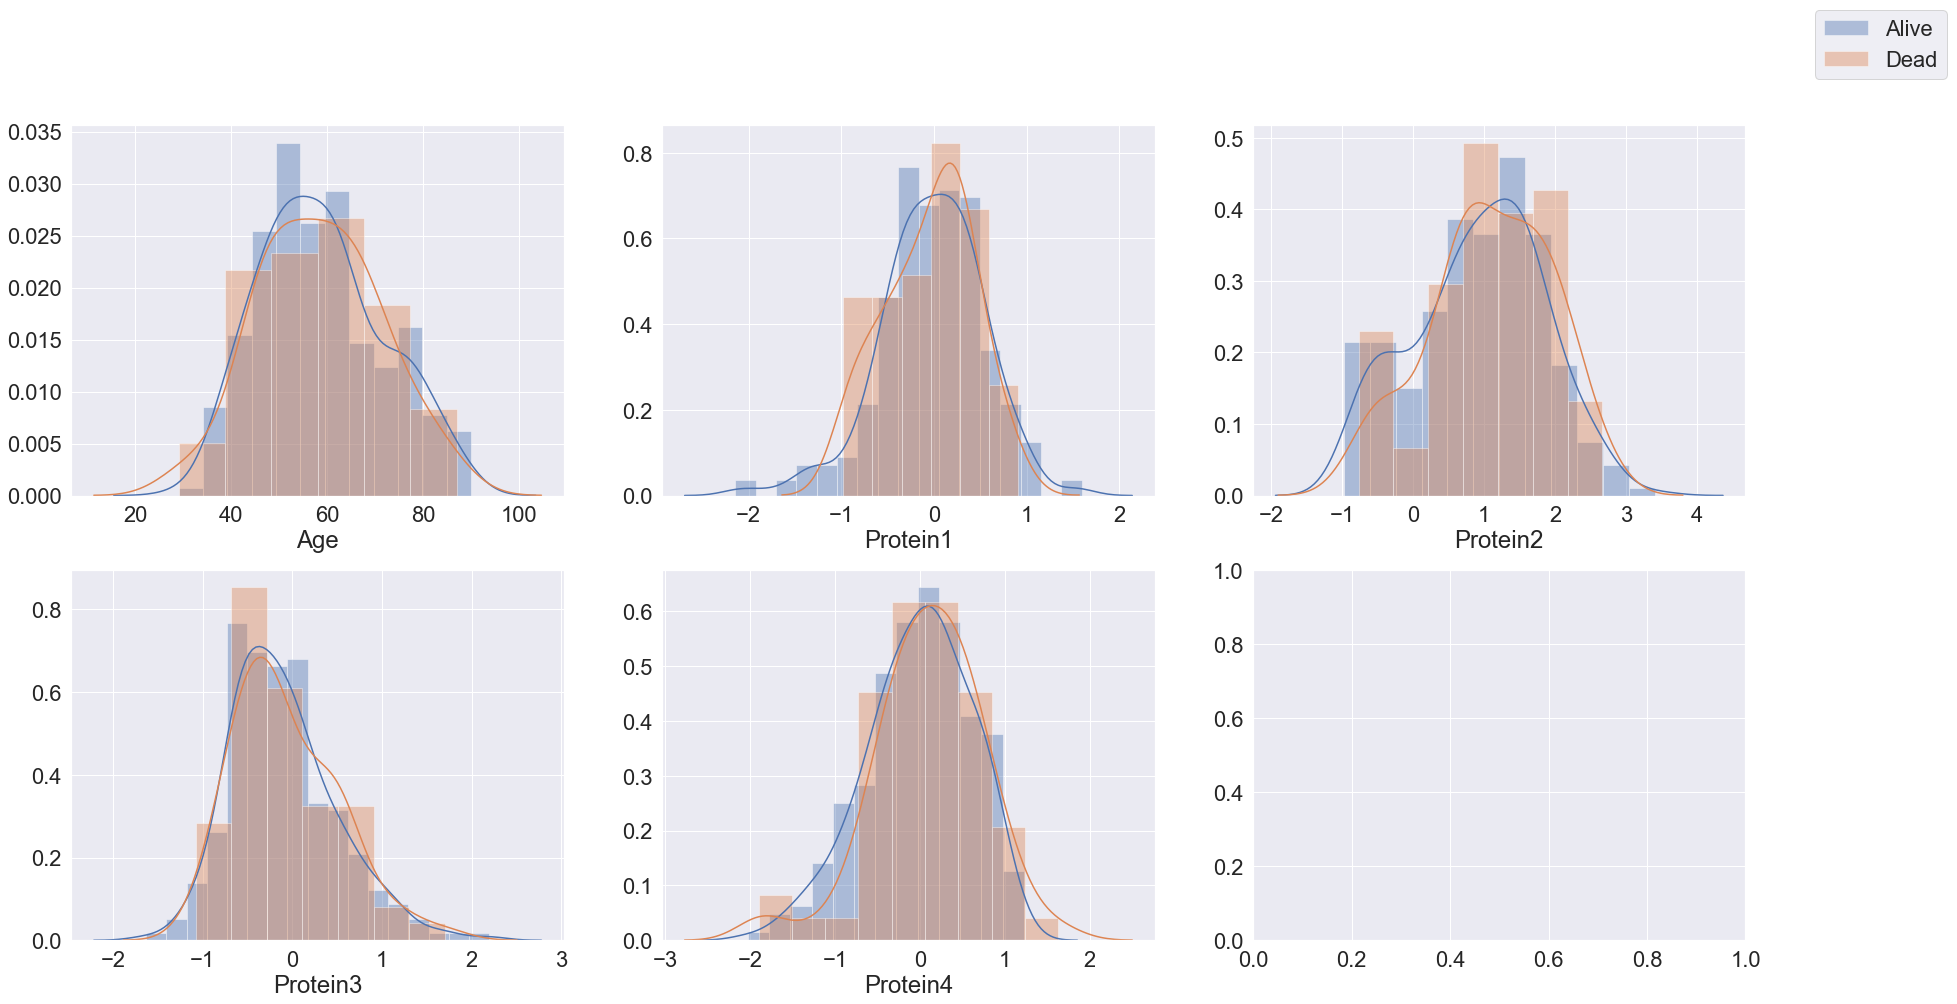

In [109]:
Alive_df = df[df['Patient_Status']=="Alive"]
Dead_df = df[df['Patient_Status']=="Dead"]
sns.set(font_scale = 2.0)
fig, ax = plt.subplots(2,3, figsize=(30, 15))
k=0
for col in df.select_dtypes(include=['float64','int64']):
    sns.distplot(Alive_df[col],label='Alive',ax=ax[k//3][k%3])
    sns.distplot(Dead_df[col],label='Dead',ax=ax[k//3][k%3])
    k=k+1
fig.legend(labels=['Alive','Dead'],fontsize='22')
fig.show()

## Correlation

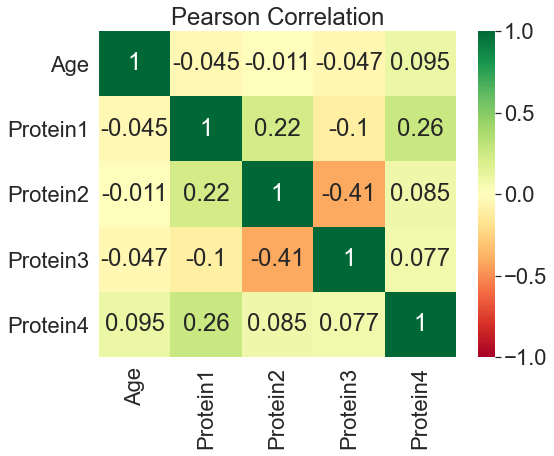

In [110]:
corr_pearson = BRC[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']].corr(method='pearson')
fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

## Gender distribution in dataset

The first thing we do is to see how many male vs female patients we have:

In [111]:
gender=BRC.groupby('Gender', as_index = False)['Age'].count()
gender.rename(columns = {'Age': 'Total'}, inplace = True)
gender['Percentage'] = (gender['Total']/gender['Total'].sum())*100


In [234]:
gender

,Gender,Age
0,FEMALE,313
1,MALE,4


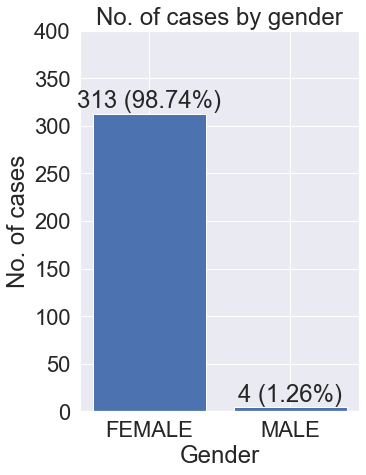

In [191]:
plt.figure(figsize = (5,7))
gen_bar = plt.bar(gender['Gender'], gender['Total'])
plt.yticks(np.arange(0,450,50))
plt.bar_label(gen_bar, labels = ['{} ({:.2f}%)'.format(t,p) for t,p in zip(gender['Total'],gender['Percentage'])], padding = 1)
plt.xlabel('Gender')
plt.ylabel('No. of cases')
plt.title('No. of cases by gender')
plt.show()

We see from above that there are just **1.26%** male of the total patients, against **98.74%** female of the total patients, in the dataset. Therefore it would be difficult for us to analyse male vs female patients, as we would be needing a large sample size to trust the results of our analysis.

## Age distribution in dataset

We can also look at the age ranges in our dataset to get a feel for its distribution. For this, we can construct a histogram:

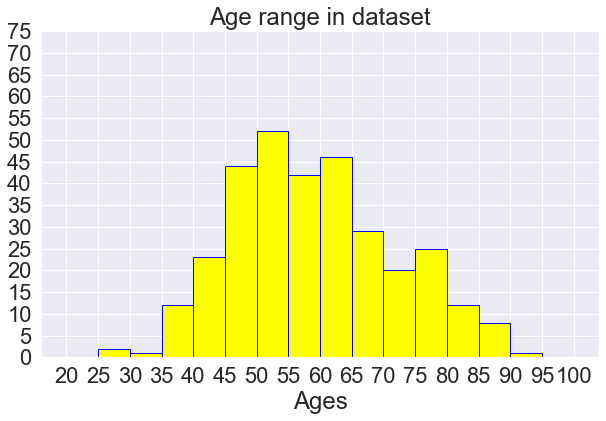

In [112]:
bins = list(range(20,105,5))

plt.figure(figsize = (10,6))
plt.hist(BRC['Age'].astype(int), width = 5, align = 'mid', bins = bins, color = 'yellow', edgecolor = 'blue')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Age range in dataset')
plt.yticks(np.arange(0,80,5))
plt.show()

In [196]:
total_cancertypes = BRC.groupby('Histology', as_index = False)['Age'].count()

In [197]:
total_cancertypes.rename(columns = {'Age': 'Total_Number'}, inplace = True)

In [198]:
total_cancertypes['Percentage'] = (total_cancertypes['Total_Number']/total_cancertypes['Total_Number'].sum())*100
total_cancertypes

,Histology,Total_Number,Percentage
0,Infiltrating Ductal Carcinoma,224,70.662461
1,Infiltrating Lobular Carcinoma,81,25.552050
2,Mucinous Carcinoma,12,3.785489


From the table above, we see that there are **224 cases of Infiltrating Ductal Carcinoma**, **81 cases of Infiltrating Lobular Carcinoma** and only **12 cases of mucinous carcinoma**.

To get a better idea of the true proportion of each number to cases to the total number of cases, we plot a bar chart with the percentage of cases:

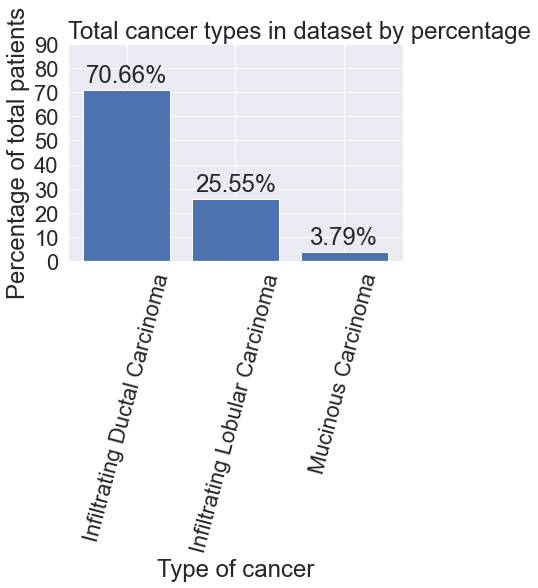

In [211]:
totals_bar = plt.bar(total_cancertypes['Histology'],total_cancertypes['Percentage'])
plt.xticks(rotation = 75)
plt.yticks(np.arange(0,100,10))
plt.xlabel('Type of cancer')
plt.ylabel('Percentage of total patients')
plt.title('Total cancer types in dataset by percentage',loc='left')
plt.bar_label(totals_bar, labels = ['{:.2f}%'.format(t) for t in totals_bar.datavalues], padding = 3)
plt.show()

So now we see that in our dataset, **70.66%** of cases are of the **Infiltrating Ductal Carcinoma** type, **25.55%** are of the **Infiltrating Lobular Carcinoma** type, and **3.79%** are of the **Mucinous Carcinoma** type. Therefore we can conclude that Infiltrating Ductal Carcinoma is the most common type of breast cancer; in any given sample dataset.

## Stages of each cancer type

We further subdivide each cancer type into its stages, to get a more elaborate picture of the distribution of our dataset:

In [38]:
#cancer_type_by_stage=BRC.groupby('Histology','Tumour_Stage', as_index = True)['Age'].count()
#cancer_type_by_stage=BRC.groupby('Tumour_Stage', as_index = False)['Age'].count()
stages_cancertype=BRC.groupby(['Histology','Tumour_Stage'])['Age'].count()

In [39]:
stages_cancertype = (BRC.groupby(['Histology', 'Tumour_Stage'], as_index = False)['Age'].count())
stages_cancertype.rename(columns = {'Age': 'Total'}, inplace = True)
stages_cancertype

,Histology,Tumour_Stage,Total
0,Infiltrating Ductal Carcinoma,I,47
1,Infiltrating Ductal Carcinoma,II,120
2,Infiltrating Ductal Carcinoma,III,57
3,Infiltrating Lobular Carcinoma,I,10
4,Infiltrating Lobular Carcinoma,II,51
5,Infiltrating Lobular Carcinoma,III,20
6,Mucinous Carcinoma,I,3
7,Mucinous Carcinoma,II,9


In [113]:
stages_cancertype = stages_cancertype.append({'Histology': 'Mucinous Carcinoma', 'Tumour_Stage':'III', 'Total':0}, ignore_index = True)

In [41]:
stages_cancertype

,Histology,Tumour_Stage,Total
0,Infiltrating Ductal Carcinoma,I,47
1,Infiltrating Ductal Carcinoma,II,120
2,Infiltrating Ductal Carcinoma,III,57
3,Infiltrating Lobular Carcinoma,I,10
4,Infiltrating Lobular Carcinoma,II,51
5,Infiltrating Lobular Carcinoma,III,20
6,Mucinous Carcinoma,I,3
7,Mucinous Carcinoma,II,9
8,Mucinous Carcinoma,III,0


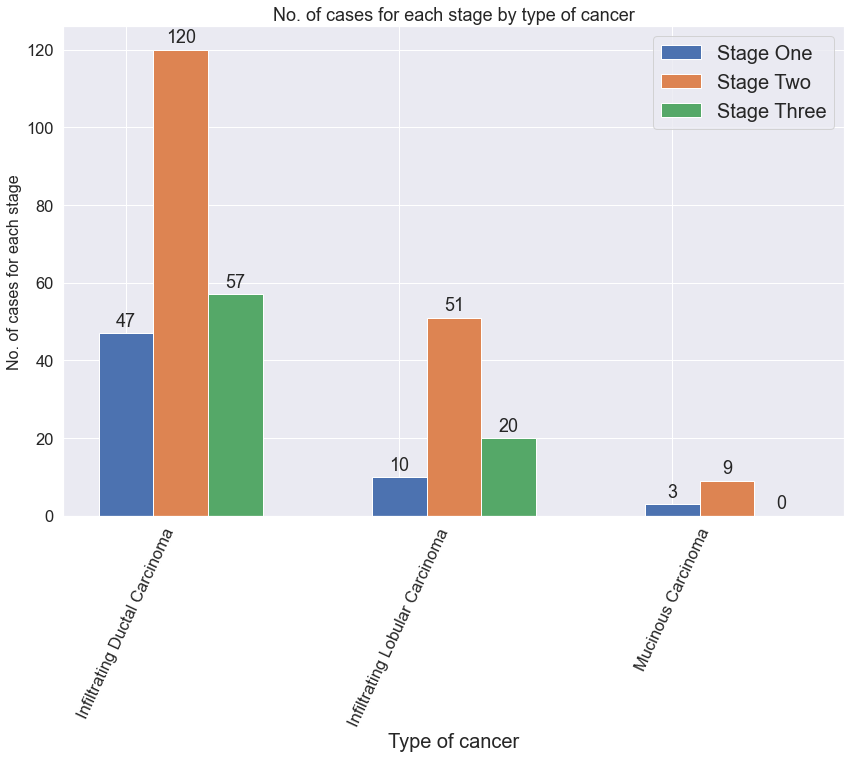

In [42]:
# we're setting the 'labels', ie the number of units on the x-axis. The x is the position of each bar, and the width is the width of each bar
labels = list(stages_cancertype['Histology'].unique())
x = np.arange(len(labels))
width = 0.2

# we create subplots, and set the size of the whole figure
fig, ax = plt.subplots(figsize = (14, 9))

# now we add the bar for each cancer type. Each plt describes each stage for one cancer type each.
plt1 = ax.bar(x, stages_cancertype.loc[stages_cancertype['Tumour_Stage'] == 'I', 'Total'], width = width, label = 'Stage One')
plt2 = ax.bar(x + width, stages_cancertype.loc[stages_cancertype['Tumour_Stage'] == 'II', 'Total'], width = width, label = 'Stage Two')
plt3 = ax.bar(x + width*2, stages_cancertype.loc[stages_cancertype['Tumour_Stage'] == 'III', 'Total'], width = width, label = 'Stage Three')

# we set where where the x values on the x-axis will be, and what their labels will be.
ax.set_xticks(x)
ax.set_xticklabels(labels)

# we put the the height of each bar on top of the bar, with some padding for neatness.
ax.bar_label(plt1, padding = 3)
ax.bar_label(plt2, padding = 3)
ax.bar_label(plt3, padding = 3)

plt.xlabel('Type of cancer', fontdict = {'fontsize': 20})
plt.ylabel('No. of cases for each stage', fontdict = {'fontsize': 16})
plt.title('No. of cases for each stage by type of cancer')

plt.legend(prop={'size': 20})
plt.xticks(rotation = 65)


plt.show()

As we can see that the number of Stage II patients for **Infiltrating Ductal Carcinoma** and **Infiltrating Lobular Carcinoma**,  are the greatest, followed by stage III. This can be due to the reason that most of the patients do not see the doctor until they are in Stage II of the disease unknowingly or would have ignored the pain.

## Age ranges for each cancer type

We can also look at the age ranges for each cancer type, to see whether any particular type favours any age range. For this we need to transform the dataset to get the number of cases in each age range.

In [143]:
# first we get subsets of the original dataframe by age range, and put each subset in a dictionary
cancer_ages_dict = {}
key = 0
for i in range(len(bins)):
    if i < len(bins) - 1:
        row = BRC.loc[(BRC['Age'] >= bins[i]) & (BRC['Age'] < bins[i + 1])][['Histology', 'Age']]
        if row.empty is False:
            cancer_ages_dict.update({'{} to {}'.format(bins[i], bins[i + 1]):row })
            key += 1
    else:
        pass

In [145]:
cancer_age_list = []

for key, val in cancer_ages_dict.items():
    age_range = key
    hist = val.groupby('Histology', as_index = False).count()['Histology']
    age_count = val.groupby('Histology', as_index = False).count()['Age']
    hist_vals = {}
    
    for h, a in zip(hist, age_count):
        hist_vals.update({'Age_range': age_range, h:a})
        
    cancer_age_list.append(hist_vals)
cancer_age_list

[{'Age_range': '25 to 30',
  'Infiltrating Ductal Carcinoma': 1,
  'Infiltrating Lobular Carcinoma': 1},
 {'Age_range': '30 to 35', 'Infiltrating Ductal Carcinoma': 1},
 {'Age_range': '35 to 40',
  'Infiltrating Ductal Carcinoma': 7,
  'Infiltrating Lobular Carcinoma': 4,
  'Mucinous Carcinoma': 1},
 {'Age_range': '40 to 45',
  'Infiltrating Ductal Carcinoma': 12,
  'Infiltrating Lobular Carcinoma': 10,
  'Mucinous Carcinoma': 1},
 {'Age_range': '45 to 50',
  'Infiltrating Ductal Carcinoma': 30,
  'Infiltrating Lobular Carcinoma': 12,
  'Mucinous Carcinoma': 2},
 {'Age_range': '50 to 55',
  'Infiltrating Ductal Carcinoma': 36,
  'Infiltrating Lobular Carcinoma': 14,
  'Mucinous Carcinoma': 2},
 {'Age_range': '55 to 60',
  'Infiltrating Ductal Carcinoma': 30,
  'Infiltrating Lobular Carcinoma': 9,
  'Mucinous Carcinoma': 3},
 {'Age_range': '60 to 65',
  'Infiltrating Ductal Carcinoma': 35,
  'Infiltrating Lobular Carcinoma': 10,
  'Mucinous Carcinoma': 1},
 {'Age_range': '65 to 70',
  '

In [224]:
# finally, we convert this list to a dataframe

cancer_byage = pd.DataFrame(cancer_ages_list)

In [225]:
# performing clean-up in the next few cells...

cancer_byage.fillna(0, inplace = True)

In [226]:
cols = ['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma']

In [227]:
for vla in cols:
    cancer_byage[vla] = cancer_byage[vla].astype(int)

In [228]:
cancer_byage

,Age_range,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
0,25 to 30,1,1,0
1,30 to 35,1,0,0
2,35 to 40,7,4,1
3,40 to 45,12,10,1
4,45 to 50,30,12,2
5,50 to 55,36,14,2
6,55 to 60,30,9,3
7,60 to 65,35,10,1
8,65 to 70,23,6,0
9,70 to 75,16,4,0


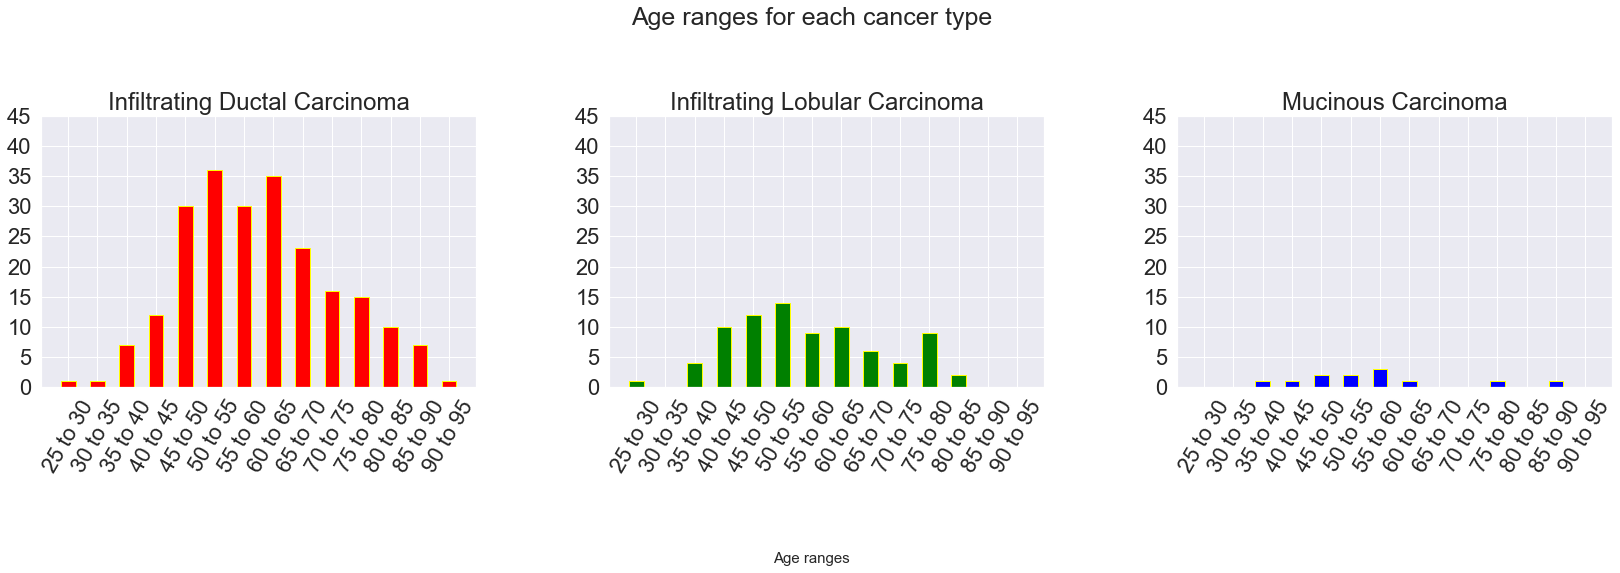

In [232]:
fig, axs = plt.subplots(1,3, figsize = (25,8))
axs[0].bar(cancer_byage['Age_range'], cancer_byage['Infiltrating Ductal Carcinoma'], width = 0.5, edgecolor = 'yellow',color = 'red')
axs[0].set_xticks(list(cancer_byage['Age_range']))
axs[0].set_xticklabels(list(cancer_byage['Age_range']), rotation = 60)
axs[0].set_yticks(range(0,50, 5))
axs[0].set_title('Infiltrating Ductal Carcinoma')

axs[1].bar(cancer_byage['Age_range'], cancer_byage['Infiltrating Lobular Carcinoma'], width = 0.5, edgecolor = 'yellow', color = 'green')
axs[1].set_xticks(list(cancer_byage['Age_range']))
axs[1].set_xticklabels(list(cancer_byage['Age_range']), rotation = 60)
axs[1].set_yticks(range(0,50, 5))
axs[1].set_title('Infiltrating Lobular Carcinoma')

axs[2].bar(cancer_byage['Age_range'], cancer_byage['Mucinous Carcinoma'], width = 0.5, edgecolor = 'yellow', color = 'blue')
axs[2].set_xticks(list(cancer_byage['Age_range']))
axs[2].set_xticklabels(list(cancer_byage['Age_range']), rotation = 60)
axs[2].set_yticks(range(0,50, 5))
axs[2].set_title('Mucinous Carcinoma')

fig.tight_layout(pad = 4)
fig.supxlabel('Age ranges', fontsize = 15)
fig.suptitle('Age ranges for each cancer type', fontsize = 25)
plt.show()

We can observe that most of the patients who are deceased by breast cancer are of middle age and the occurence of cancer is going down in early 20s-30s aged patients and as well as old age patients.

- Patients who are aged 45+(**13% to 30%** for ages 45-65) are double in number than the patients who are aged less than 45 having **Infiltrating Ductal Carcinoma**
- Case for **Infiltrating Lobular Carcinoma** is different, here the number of patients rises gradually with respect to age, where it starts from **1%** of patients from age **25** to just **15%** in age range **50-55**. And as the age rises from the number of deceased patient decreases upto 5% till age range 75-80.
- In the case of  **Mucinous Carcinoma**, due to smaller number of sample data it is difficult to interpret any trends or to say it shows any trend.

## Marker Proteins

A cancer tumor often produces a specific protein in the blood that serves as a marker for the cancer. These protein levels can be measured via blood tests to determine the possibility of cancer. 

Our dataset does not name the four marker proteins, nor does it give the units of measurement. Nevertheless, we can measure their levels relative to each other (as well as other attributes in the dataset) to see if any patterns jump out.

In [43]:
proteintype = BRC[['Protein1', 'Protein2', 'Protein3', 'Protein4']]

In [44]:
proteintype

,Protein1,Protein2,Protein3,Protein4
0,0.080353,0.42638,0.54715,0.273680
1,-0.420320,0.57807,0.61447,-0.031505
2,0.213980,1.31140,-0.32747,-0.234260
3,0.345090,-0.21147,-0.19304,0.124270
4,0.221550,1.90680,0.52045,-0.311990
...,...,...,...,...
329,0.231800,0.61804,-0.55779,-0.517350
330,0.732720,1.11170,-0.26952,-0.354920
331,-0.719470,2.54850,-0.15024,0.339680
332,0.479400,2.05590,-0.53136,-0.188480


In [46]:
p_labels = proteintype.columns

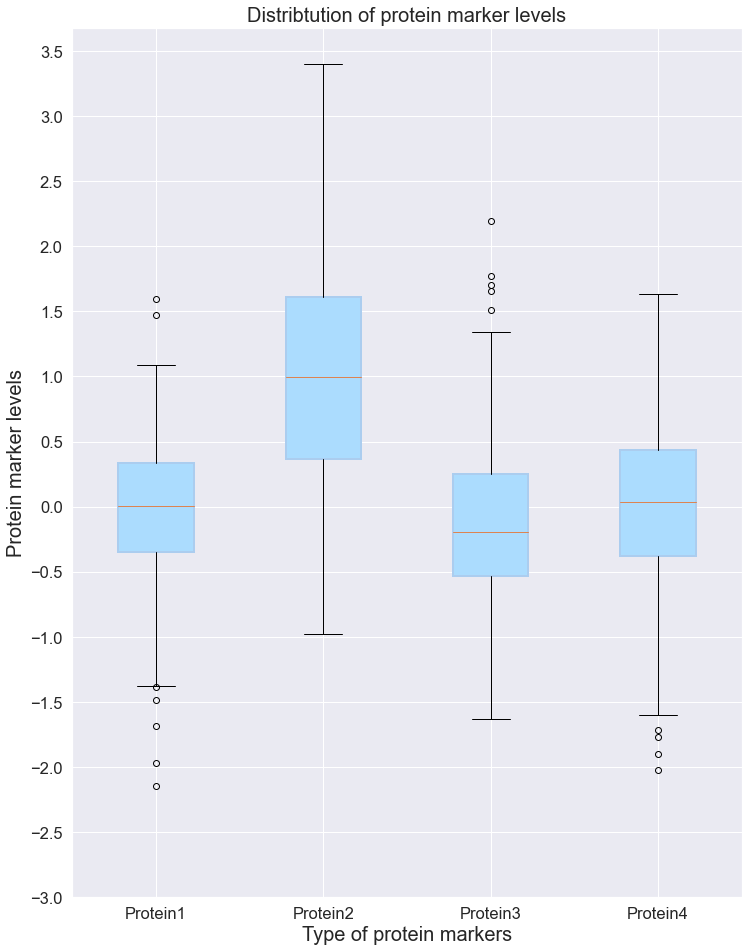

In [47]:
plt.figure(figsize = (12, 16))

boxes = plt.boxplot([list(proteintype[ptype]) for ptype in proteintype], labels = p_labels, patch_artist = True)

for box in boxes['boxes']:
    # set edge color
    box.set(color = '#abcdef', linewidth = 2)
    
    # set fill color
    box.set(facecolor = '#abdcfe')

plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Type of protein markers', fontdict = {'fontsize': 20})
plt.ylabel('Protein marker levels', fontdict = {'fontsize': 20})
plt.title('Distribtution of protein marker levels', fontdict = {'fontsize': 20})

plt.show()

From the above box-and-whiskers plot, we see the following:

The **mean** of **Marker Protein 1** is at around **0.0**, and the **IQR** is relatively small, from **-0.40 to 0.35**. The **total spread** is around **-1.7 to 1.1**, but there are **a few outliers on either side**.

The **mean** of the **Marker Protein 2** is the highest, hovering somewhere around **1.0**. Its **IQR** is the largest as well from around **0.35 to 1.60**. The **total spread** is correspondingly the largest, from around **-1.0 to 3.4**, but there are **no outliers**.

The **mean of Marker Protein 3** is at around **-0.1**. Its **IQR** is a little greater than that of the Protein 1 Marker, from **-0.6 to 0.2**, and its **total spread** is slightly larger as well from **-1.7 to 1.4**. There are **outliers on the higher side**, but none on the lower side.

The **mean** of **Marker Protein 4** is at around **0.0** as well. Its **IQR** is of a similar size to that of the Protein 3 Marker, from **-0.4 to 0.4**. Its **total spread** is from **-1.5 to 1.6**, with **some outliers on the lower side**. 

### Cancer types by marker protein levels

It would be good to see what each protein level is in each type of cancer, as differences in levels of different proteins could signal the type of breast cancer. For this, we could create a scatter plot to see what results we get. 

In [122]:
colors = ['red','blue','green','orange']

In [124]:
p_labels = list(p_labels)

In [118]:
type_slices = BRC[['Histology', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]

In [120]:
type_slices.head()

,Histology,Protein1,Protein2,Protein3,Protein4
0,Infiltrating Ductal Carcinoma,0.080353,0.42638,0.54715,0.273680
1,Mucinous Carcinoma,-0.420320,0.57807,0.61447,-0.031505
2,Infiltrating Ductal Carcinoma,0.213980,1.31140,-0.32747,-0.234260
3,Infiltrating Ductal Carcinoma,0.345090,-0.21147,-0.19304,0.124270
4,Infiltrating Ductal Carcinoma,0.221550,1.90680,0.52045,-0.311990


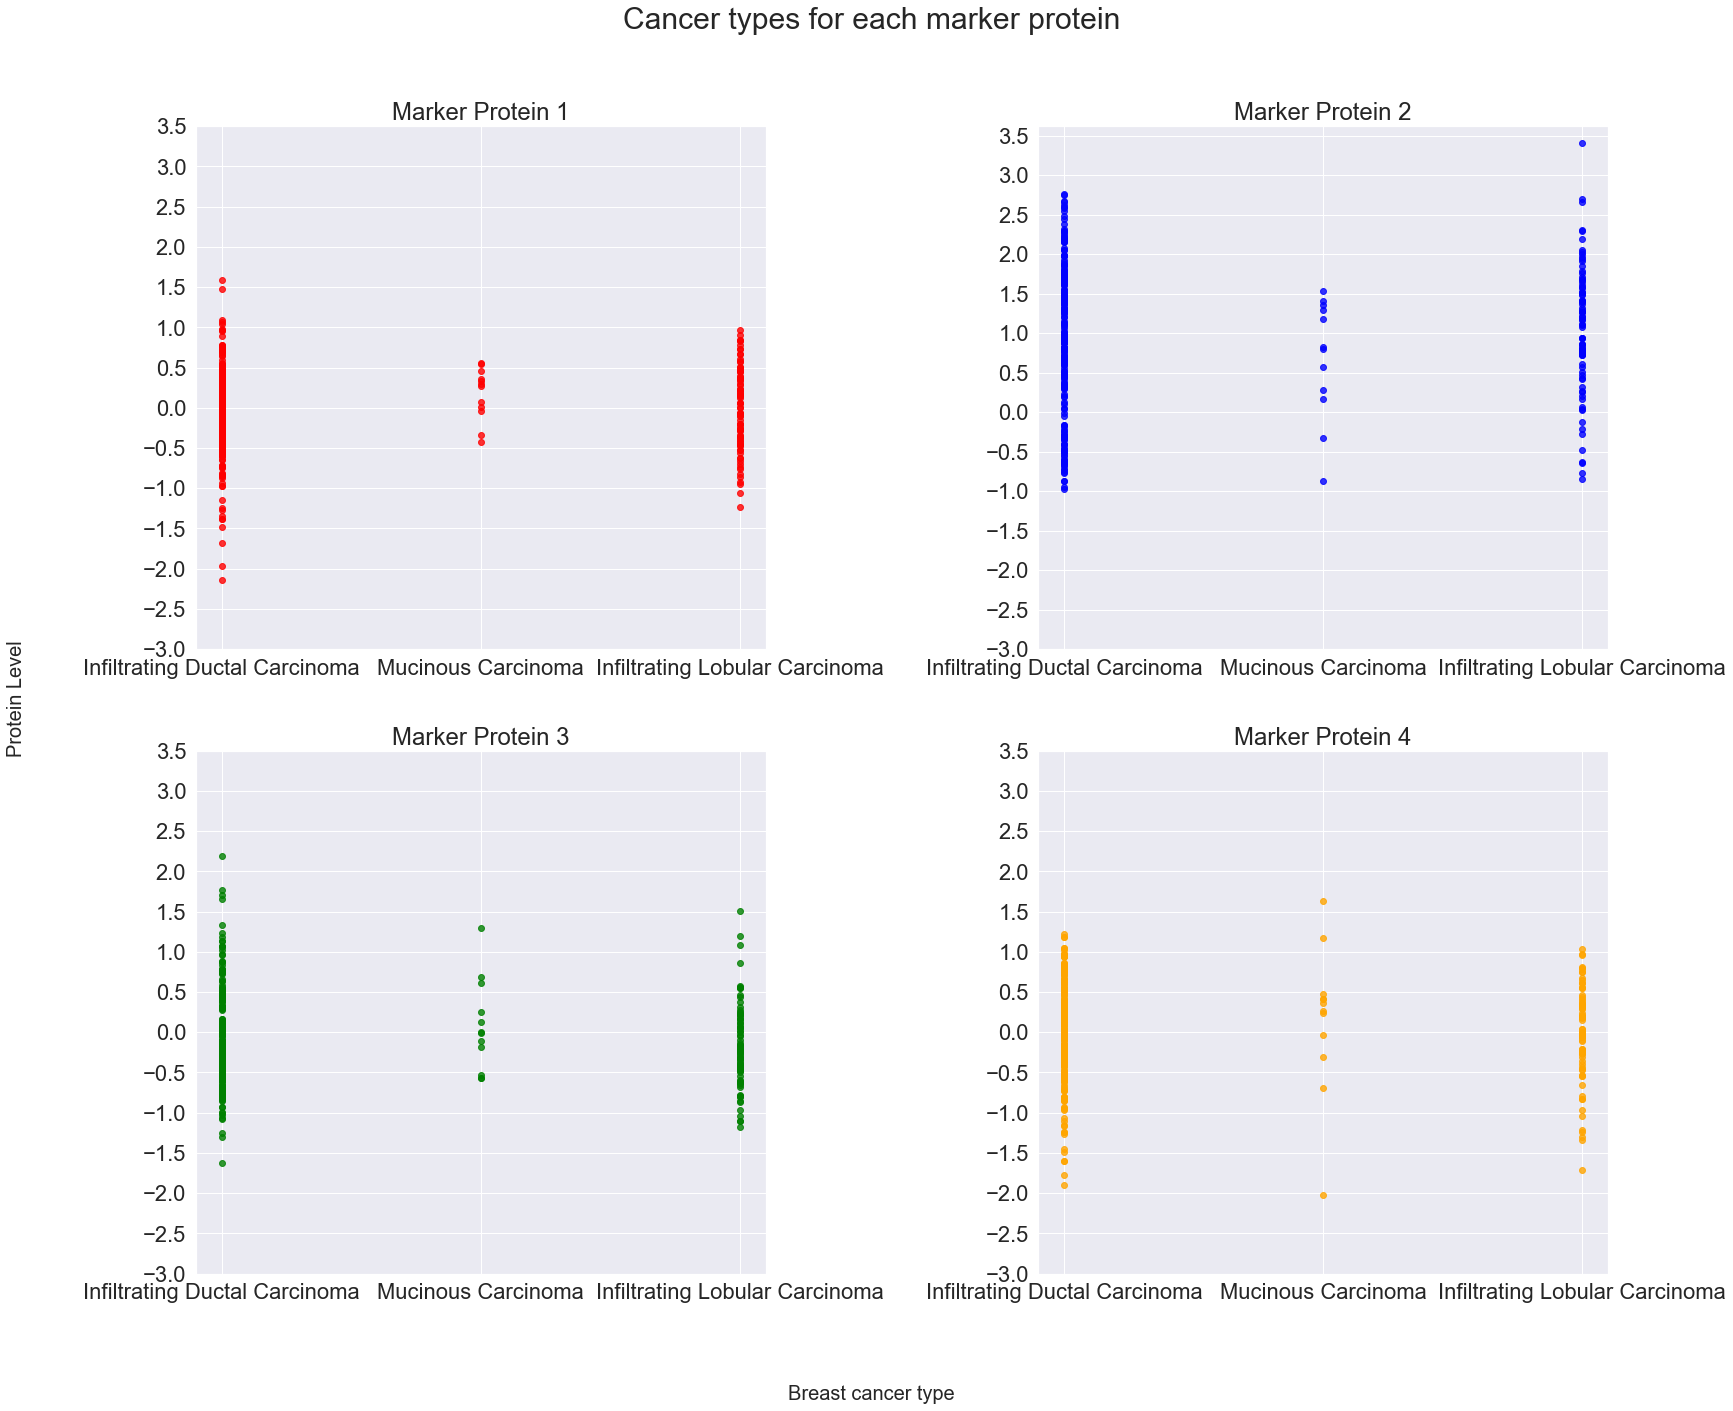

In [125]:
fig, axs = plt.subplots(2,2, figsize = (25,20))
axs[0,0].scatter(type_slices['Histology'], type_slices['Protein1'], color = colors[0], alpha = 0.8)
axs[0,0].set_title('Marker Protein 1')
axs[0,0].set_yticks(np.arange(-3, 4, 0.5))
axs[0,1].scatter(type_slices['Histology'], type_slices['Protein2'], color = colors[1], alpha = 0.8)
axs[0,1].set_title('Marker Protein 2')
axs[0,1].set_yticks(np.arange(-3, 4, 0.5))
axs[1,0].scatter(type_slices['Histology'], type_slices['Protein3'], color = colors[2], alpha = 0.8)
axs[1,0].set_title('Marker Protein 3')
axs[1,0].set_yticks(np.arange(-3, 4, 0.5))
axs[1,1].scatter(type_slices['Histology'], type_slices['Protein4'], color = colors[3], alpha = 0.8)
axs[1,1].set_title('Marker Protein 4')
axs[1,1].set_yticks(np.arange(-3, 4, 0.5))

#fig.yticks(np.arange(-3, 4, 0.5))


plt.suptitle('Cancer types for each marker protein', fontsize = 30)
fig.supylabel('Protein Level', fontsize = 20)
fig.supxlabel('Breast cancer type', fontsize = 20)
plt.tight_layout(pad = 2)

plt.show()

Here we see the distribution patterns of protein markers for all the breast cancer types. 

**Marker Protein 1:**
We see that for the most part, the values are symmetrically spaced around the 0.0 point. However, the levels for **IDC** end to dip more towards the negative, going down to as far as -2.1, which could be an indicator of this type of cancer should such low levels show up in reports.

**Marker Protein 2:**
The values here are higher than those for Marker Protein 1. However, with the exception of a few outliers, the ranges all seem the same for all three types of cancers, except for MCC, whose upper range is far smaller than that of the other two cancers. 

**Marker Protein 3:**
The values for Marker Protein 3 show a similar distribution to that of Marker Protein 1. The only notable difference here is in the values for IDC, which go as high as +2.0. This high level is not reached in the other two types, and could indicate the presence of **IDC** in very high Protein 3 levels. 

**Marker Protein 4:**
The values for this protein are, again, similar to protein 1 and 3. 

### Marker protein levels by cancer types

Alternatively, we could look at the marker protein composition is in each type of cancer, as a distinct profile could also alert us to the type of cancer.

In [126]:
Idc = type_slices.loc[type_slices['Histology'] == 'Infiltrating Ductal Carcinoma'][['Protein1','Protein2','Protein3','Protein4']]
Ilc = type_slices.loc[type_slices['Histology'] == 'Infiltrating Lobular Carcinoma'][['Protein1','Protein2','Protein3','Protein4']]
Mcc = type_slices.loc[type_slices['Histology'] == 'Mucinous Carcinoma'][['Protein1','Protein2','Protein3','Protein4']]

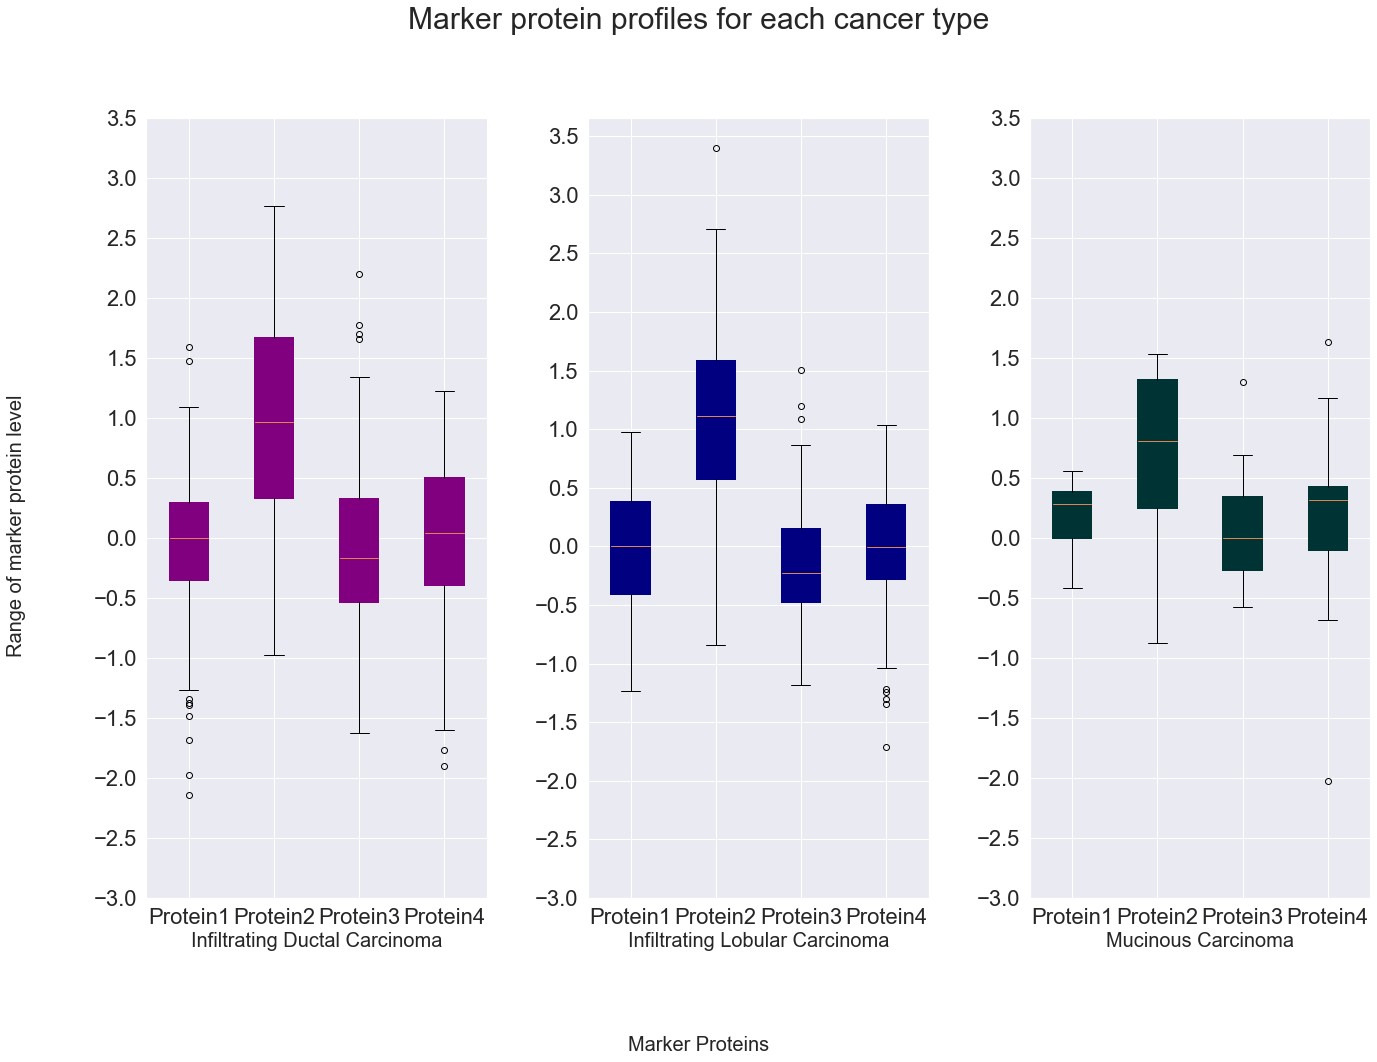

In [129]:
# first we create an overll figure

fig = plt.figure(figsize = (20,15))

# for the first, leftmost subplot
plt.subplot(1,3,1)
Idc_boxes = plt.boxplot([list(Idc[t]) for t in Idc], labels = list(Idc.columns), patch_artist = True)

# setting the colors for the boxplot
for box in Idc_boxes['boxes']:
    # set edge color
    box.set(color = '#800080', linewidth = 2)
    
    # set fill color
    box.set(facecolor = '#800080')
# setting range of yticks and the labels
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Infiltrating Ductal Carcinoma', fontsize = 20)


# we repeat the process for the other two subplots
plt.subplot(1,3,2)    
    
Ilc_boxes = plt.boxplot([list(Ilc[t]) for t in Ilc], labels = list(Ilc.columns), patch_artist = True)

for box in Ilc_boxes['boxes']:
    # set edge color
    box.set(color = '#000080', linewidth = 2)
    
    # set fill color
    box.set(facecolor = '#000080')
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Infiltrating Lobular Carcinoma', fontsize = 20)



plt.subplot(1,3,3)

Mcc_boxes = plt.boxplot([list(Mcc[t]) for t in Mcc], labels = list(Mcc.columns), patch_artist = True)

for box in Mcc_boxes['boxes']:
    # set edge color
    box.set(color = '#003333', linewidth = 2)
    
    # set fill color
    box.set(facecolor = '#003333')
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Mucinous Carcinoma', fontdict = {'fontsize':20})


# finally, we put in the title and labels for the overall figure
fig.suptitle('Marker protein profiles for each cancer type', fontsize = 30)
fig.supxlabel('Marker Proteins', fontsize = 20)
fig.supylabel('Range of marker protein level', fontsize = 20)
fig.tight_layout(pad = 2)

plt.show()

The above box-and-whiskers plots show us the marker protein levels for each type of breast cancer. The plots corraborate the distributions that we saw in the previous charts, as well as giving us some new insights. Some of the overall trends to be noted are:
- The highest levels of marker protein found in all three cancer types is marker protein 2.
- While the overall range for protein 1 in IDC and ILC are similar, the presence of outliers on the lower end of the scale in IDC could indicate the possibility of IDC in very low levels of Protein 1.
- The ranges for marker proteins 1, 2 and 3 for MCC are far tighter compared to the other two types of cancer. 

Taking the figures of cancers types by marker proteins and protein profiles for each type of cancer, we can come to the following rudimentary conclusions:
- Very low levels of protein 1 and very high levels of protein 3 could mean the possibility of **Infiltrating Ductal Carcinoma**.
- Very high or very low levels of proteins 1, 2 and 3 could lessen the possibility of the cancer type being **Mucinous Carcinoma**.

### Marker protein level by stage for each type of cancer

In the above analysis, we have seen the protein levels by cancer type, and cancer types by protein levels. A  more elaborate picture could be constructed by checking the protein marker levels by stage for each cancer type, with the assumption being that each stage should have a different protein level. 

In [130]:
Idc_level = BRC.loc[BRC['Histology'] == BRC['Histology'].unique()[0]][['Tumour_Stage','Protein1', 'Protein2','Protein3','Protein4']]
Mcc_level = BRC.loc[BRC['Histology'] == BRC['Histology'].unique()[1]][['Tumour_Stage','Protein1', 'Protein2','Protein3','Protein4']]
Ilc_level = BRC.loc[BRC['Histology'] == BRC['Histology'].unique()[2]][['Tumour_Stage','Protein1', 'Protein2','Protein3','Protein4']]

In [134]:
Idc_level['Tumour_Stage'] = [len(vi) for vi in Idc_level['Tumour_Stage']]
Ilc_level['Tumour_Stage'] = [len(vi) for vi in Ilc_level['Tumour_Stage']]
Mcc_level['Tumour_Stage'] = [len(vi) for vi in Mcc_level['Tumour_Stage']]

In [156]:
labels = list(Idc_l['Tumour_Stage'].unique())

ConversionError: Failed to convert value(s) to axis units: ['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma', 'Mucinous Carcinoma']

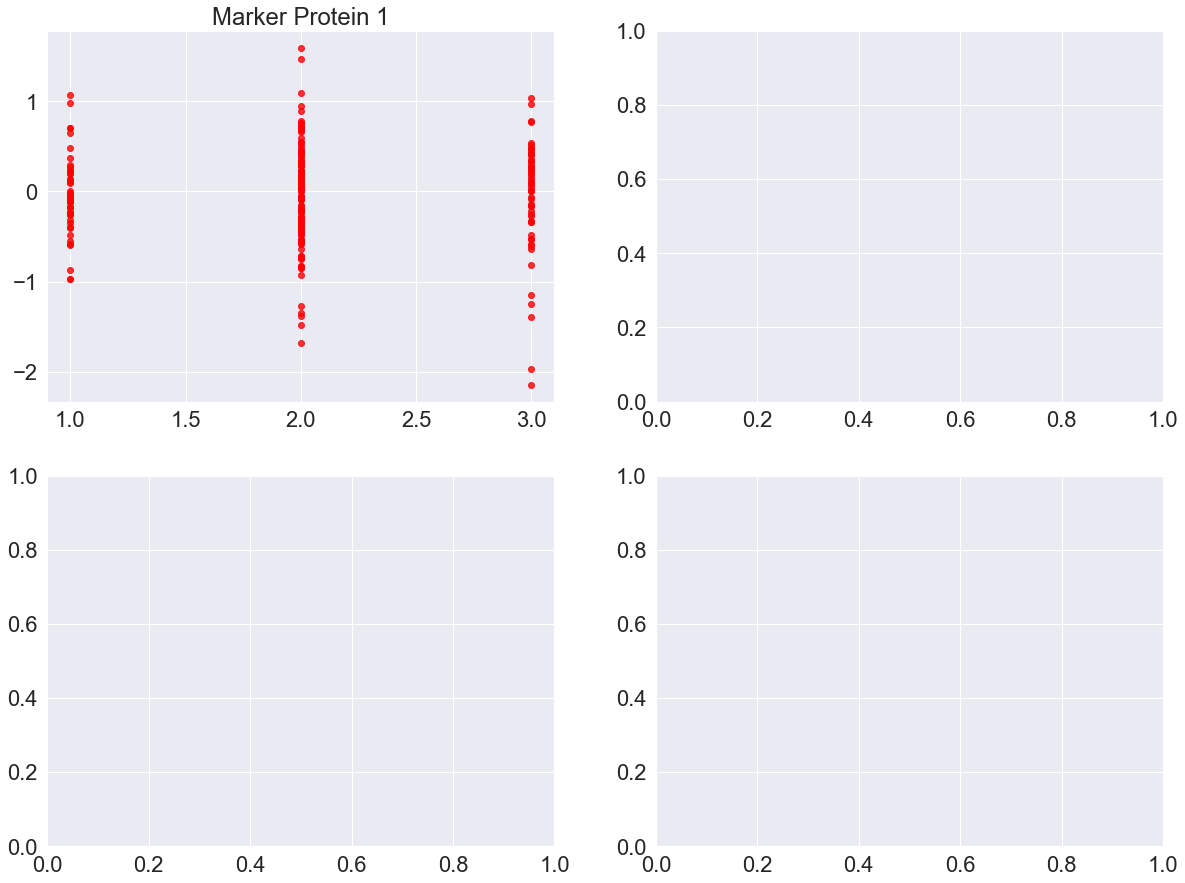

In [135]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(Idc_level['Tumour_Stage'],Idc_level['Protein1'], color = colors[0], alpha = 0.8)
axs[0,0].set_title('Marker Protein 1')
axs[0,0].set_xticks(labels)
axs[0,0].set_yticks(np.arange(-3, 4, 0.5))
axs[0,1].scatter(Idc_level['Tumour_Stage'],Idc_level['Protein2'], color = colors[1], alpha = 0.8)
axs[0,1].set_title('Marker Protein 2')
axs[0,1].set_xticks(labels)
axs[0,1].set_yticks(np.arange(-3, 4, 0.5))
axs[1,0].scatter(Idc_level['Tumour_Stage'],Idc_level['Protein3'], color = colors[2], alpha = 0.8)
axs[1,0].set_title('Marker Protein 3')
axs[1,0].set_xticks(labels)
axs[1,0].set_yticks(np.arange(-3, 4, 0.5))
axs[1,1].scatter(Idc_level['Tumour_Stage'],Idc_level['Protein4'], color = colors[3], alpha = 0.8)
axs[1,1].set_title('Marker Protein 4')
axs[1,1].set_xticks(labels)
axs[1,1].set_yticks(np.arange(-3, 4, 0.5))


plt.suptitle('Protein levels for each stage in Infiltrating Ductal Carcinoma', fontsize = 25)
fig.supylabel('Protein Level', fontsize = 20)
fig.supxlabel('Cancer Stage', fontsize = 20)
plt.tight_layout(pad = 2)

plt.show()

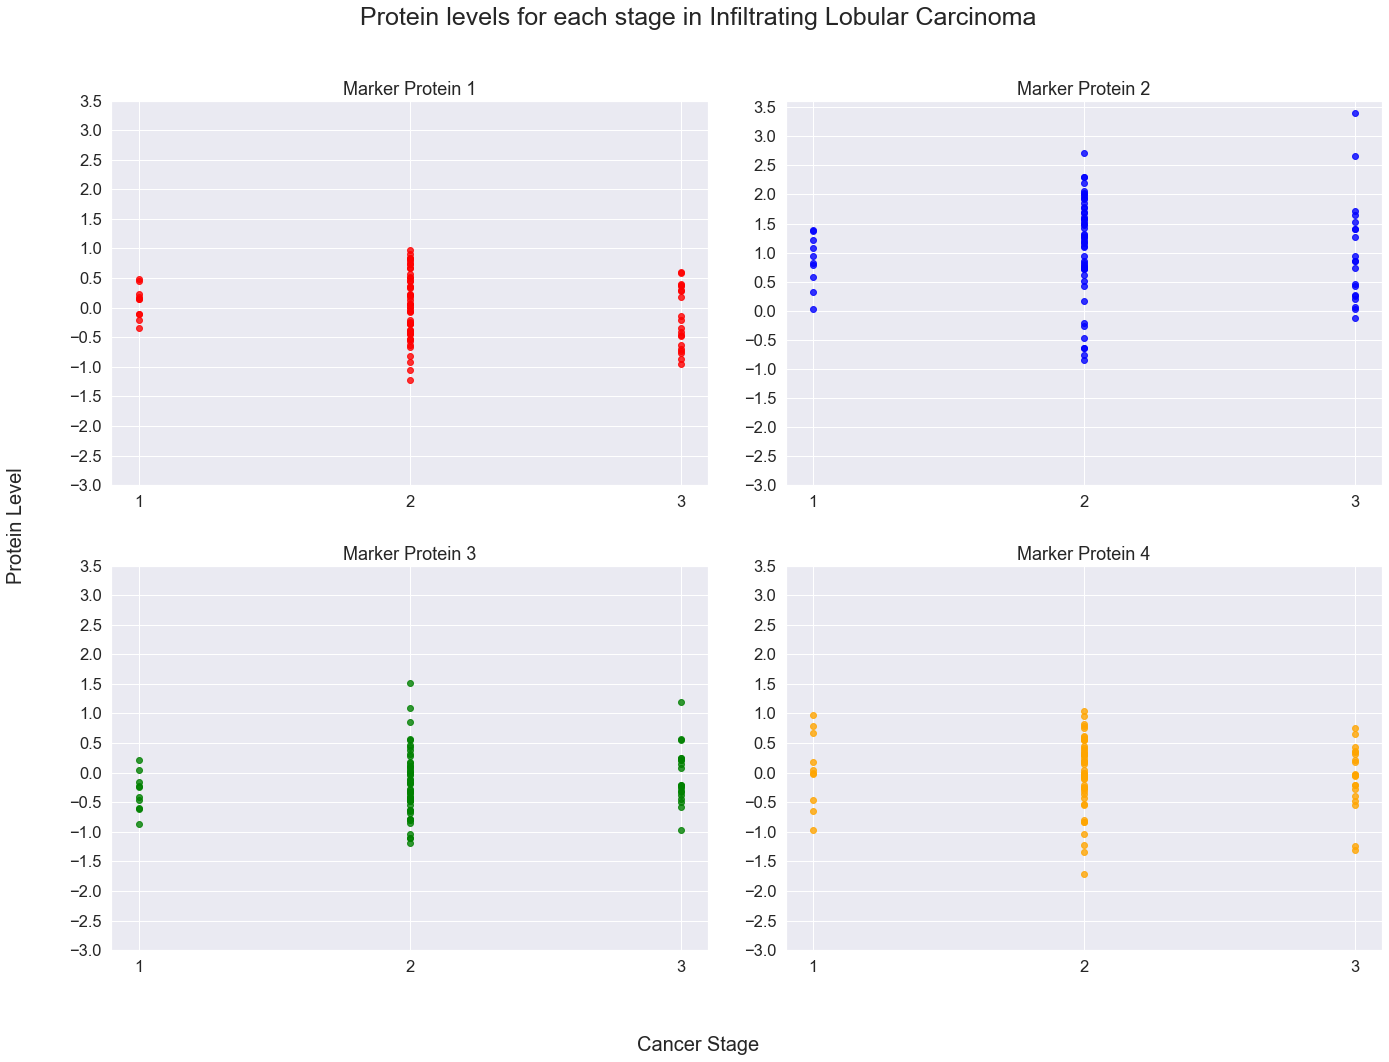

In [158]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(ilc_l['Tumour_Stage'],ilc_l['Protein1'], color = color_list[0], alpha = 0.8)
axs[0,0].set_title('Marker Protein 1')
axs[0,0].set_xticks(labels)
axs[0,0].set_yticks(np.arange(-3, 4, 0.5))
axs[0,1].scatter(ilc_l['Tumour_Stage'],ilc_l['Protein2'], color = color_list[1], alpha = 0.8)
axs[0,1].set_title('Marker Protein 2')
axs[0,1].set_xticks(labels)
axs[0,1].set_yticks(np.arange(-3, 4, 0.5))
axs[1,0].scatter(ilc_l['Tumour_Stage'],ilc_l['Protein3'], color = color_list[2], alpha = 0.8)
axs[1,0].set_title('Marker Protein 3')
axs[1,0].set_xticks(labels)
axs[1,0].set_yticks(np.arange(-3, 4, 0.5))
axs[1,1].scatter(ilc_l['Tumour_Stage'],ilc_l['Protein4'], color = color_list[3], alpha = 0.8)
axs[1,1].set_title('Marker Protein 4')
axs[1,1].set_xticks(labels)
axs[1,1].set_yticks(np.arange(-3, 4, 0.5))


plt.suptitle('Protein levels for each stage in Infiltrating Lobular Carcinoma', fontsize = 25)
fig.supylabel('Protein Level', fontsize = 20)
fig.supxlabel('Cancer Stage', fontsize = 20)
plt.tight_layout(pad = 2)

plt.show()

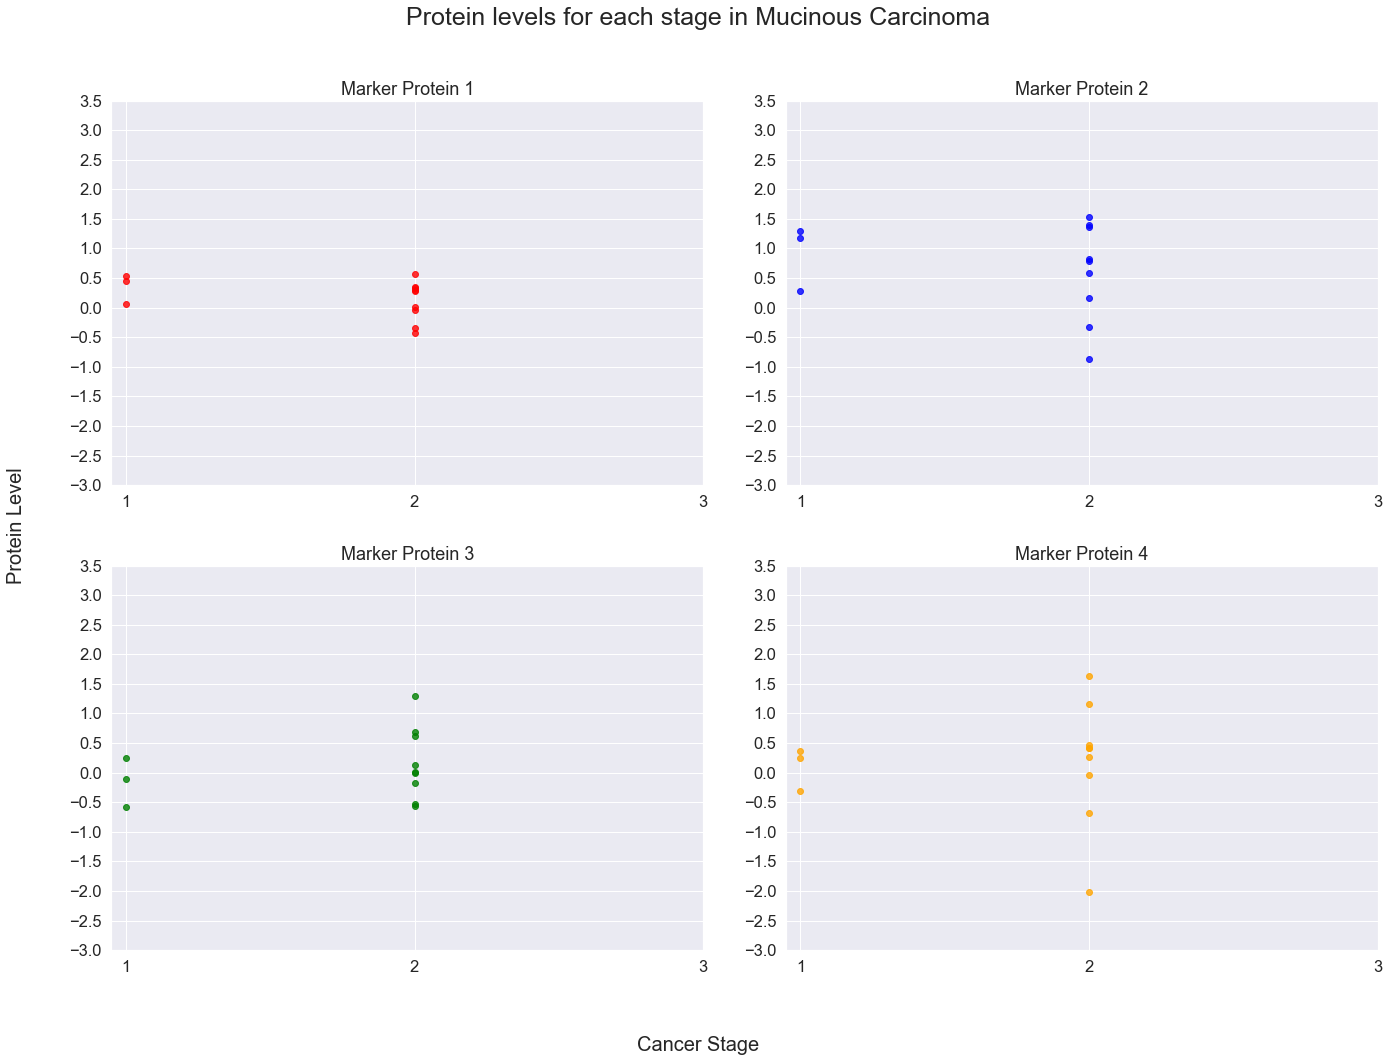

In [159]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(mcc_l['Tumour_Stage'],mcc_l['Protein1'], color = color_list[0], alpha = 0.8)
axs[0,0].set_title('Marker Protein 1')
axs[0,0].set_xticks(labels)
axs[0,0].set_yticks(np.arange(-3, 4, 0.5))
axs[0,1].scatter(mcc_l['Tumour_Stage'],mcc_l['Protein2'], color = color_list[1], alpha = 0.8)
axs[0,1].set_title('Marker Protein 2')
axs[0,1].set_xticks(labels)
axs[0,1].set_yticks(np.arange(-3, 4, 0.5))
axs[1,0].scatter(mcc_l['Tumour_Stage'],mcc_l['Protein3'], color = color_list[2], alpha = 0.8)
axs[1,0].set_title('Marker Protein 3')
axs[1,0].set_xticks(labels)
axs[1,0].set_yticks(np.arange(-3, 4, 0.5))
axs[1,1].scatter(mcc_l['Tumour_Stage'],mcc_l['Protein4'], color = color_list[3], alpha = 0.8)
axs[1,1].set_title('Marker Protein 4')
axs[1,1].set_xticks(labels)
axs[1,1].set_yticks(np.arange(-3, 4, 0.5))


plt.suptitle('Protein levels for each stage in Mucinous Carcinoma', fontsize = 25)
fig.supylabel('Protein Level', fontsize = 20)
fig.supxlabel('Cancer Stage', fontsize = 20)
plt.tight_layout(pad = 2)

plt.show()

Unfortunately, there does not appear to be an association between cancer stage and protein levels for any of the cancer types. Further investigation needs to be done to see whether levels are truly variable for all stages in all cancers, or whether it is simply a quirk of our dataset.

### Mapping ages to protein levels

Another good way to get a measure of our data is to look at the levels of marker proteins by age. This could give us an idea of whether marker levels could be a good prognostic indicator by age.

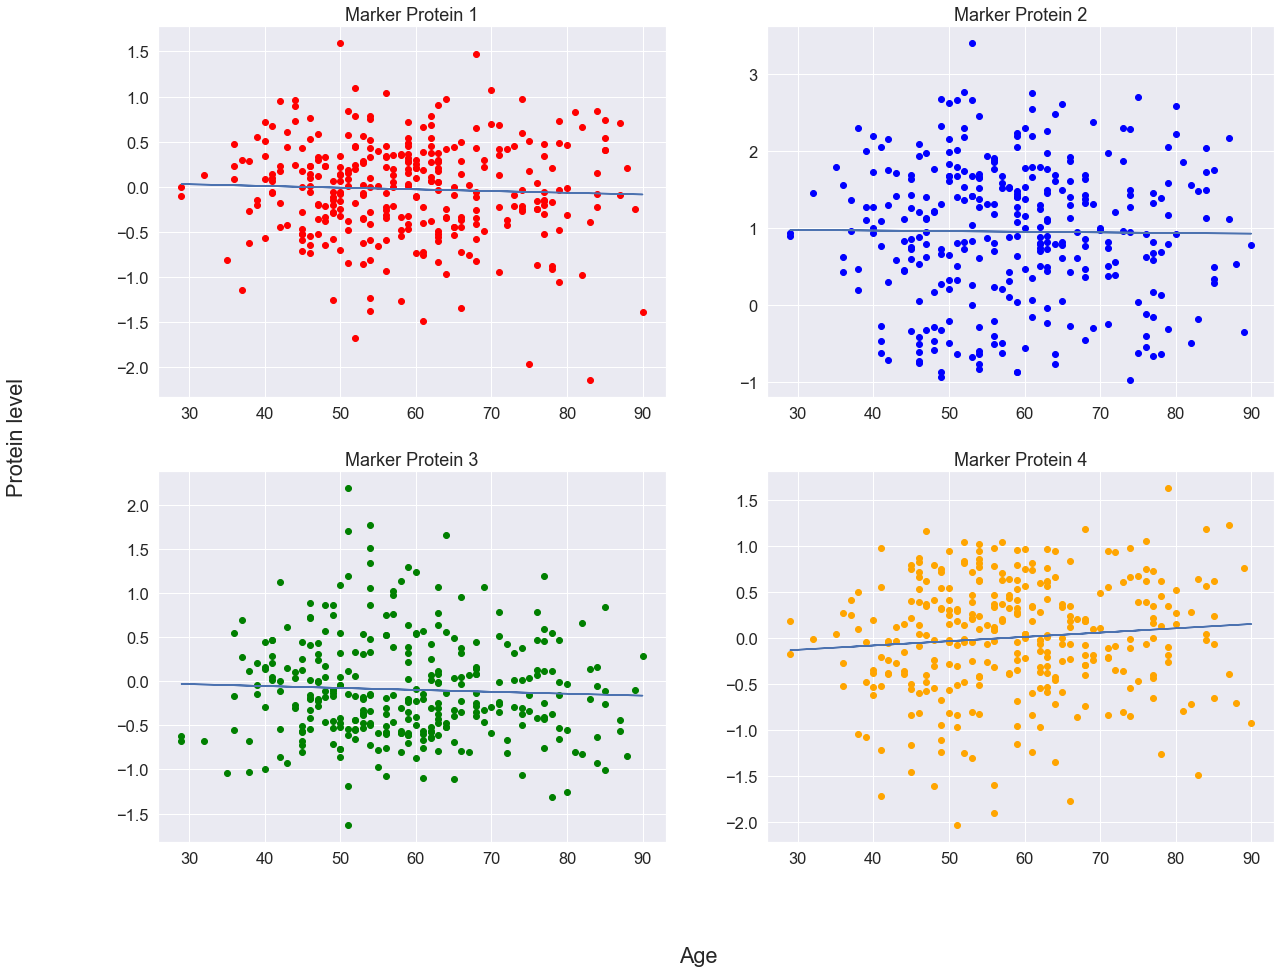

In [160]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(BRC['Age'], BRC['Protein1'], color = color_list[0])
m, b = np.polyfit(BRC['Age'], BRC['Protein1'],1)
axs[0,0].plot(BRC['Age'], m * BRC['Age'] + b)
axs[0,0].set_title('Marker Protein 1')

axs[0,1].scatter(BRC['Age'], BRC['Protein2'], color = color_list[1])
m, b = np.polyfit(BRC['Age'], BRC['Protein2'],1)
axs[0,1].plot(BRC['Age'], m * BRC['Age'] + b)
axs[0,1].set_title('Marker Protein 2')

axs[1,0].scatter(BRC['Age'], BRC['Protein3'], color = color_list[2])
m, b = np.polyfit(BRC['Age'], BRC['Protein3'],1)
axs[1,0].plot(BRC['Age'], m * BRC['Age'] + b)
axs[1,0].set_title('Marker Protein 3')

axs[1,1].scatter(BRC['Age'], BRC['Protein4'], color = color_list[3])
m, b = np.polyfit(BRC['Age'], BRC['Protein4'],1)
axs[1,1].plot(BRC['Age'], m * BRC['Age'] + b)
axs[1,1].set_title('Marker Protein 4')

fig.supxlabel('Age')
fig.supylabel('Protein level')
plt.show()


The regression lines in the above charts make it clear that there is no real association between any of the protein markers and age.

## Checking ER/PR/HER2 statuses

**PR(Progesterone Receptor)**, **ER(Estrogen Receptor)** may be found in breast cancer cells. Cancer cells with these receptors depend on estrogen and related hormones, such as progesterone, to grow. About two-thirds of breast cancers are ER and/or PR positive.

**HER2(Human Epidermal growth factor Receptor 2)** is a protein that can play a role in the development of breast cancer.  HER2-positive breast cancers tend to grow faster and are more likely to spread and come back compared to HER2-negative breast cancers. But there are medicines specifically for HER2-positive breast cancers.

To see what patterns these receptors follow in patients with breast cancer, we will first check the number of patients who are positive for these receptors:

In [103]:
n_markers = BRC[['Histology', 'ER status', 'PR status', 'HER2 status']]

#### For ER status:

In [104]:
n_markers.loc[n_markers['ER status'] == 'Positive'].count()

Histology      317
ER status      317
PR status      317
HER2 status    317
dtype: int64

#### For HER2 status:

In [105]:
n_markers.loc[n_markers['HER2 status'] == 'Positive'].count()

Histology      29
ER status      29
PR status      29
HER2 status    29
dtype: int64

In [106]:
n_markers.loc[n_markers['HER2 status'] == 'Negative'].count()

Histology      288
ER status      288
PR status      288
HER2 status    288
dtype: int64

#### For PR status:

In [107]:
n_markers.loc[n_markers['PR status'] == 'Positive'].count()

Histology      317
ER status      317
PR status      317
HER2 status    317
dtype: int64

The above filtering shows us that **all patients in the dataset have a positive PR(Progesterone Receptor) and ER(Estrogen Receptor) status**, which means that analyses based on these two receptors is unlikely to be beneficial. However the **HER2 status is both positive and negative**, which could be useful in analysis. 

First we filter the relevant data:

In [108]:
a=BRC.groupby('HER2 status', as_index = False)['Age'].count()
a.rename(columns = {'Age': 'Total'}, inplace = True)
a

,HER2 status,Total
0,Negative,288
1,Positive,29


In [109]:
# we get the attributes for positive and negative status patients into two dataframes
her2_alive = BRC.loc[BRC['Patient_Status'] == 'Alive'][['Age', 'Tumour_Stage', 'Histology', 'HER2 status']]
her2_dead = BRC.loc[BRC['Patient_Status'] == 'Dead'][['Age', 'Tumour_Stage', 'Histology', 'HER2 status']]

In [110]:
# then we group by whether patient status is alive or dead
alive_stat = her2_alive.groupby('HER2 status', as_index = False)['Age'].count()
dead_stat = her2_dead.groupby('HER2 status', as_index = False)['Age'].count()

In [111]:
alive_stat  

,HER2 status,Age
0,Negative,230
1,Positive,25


In [112]:
dead_stat 

,HER2 status,Age
0,Negative,58
1,Positive,4


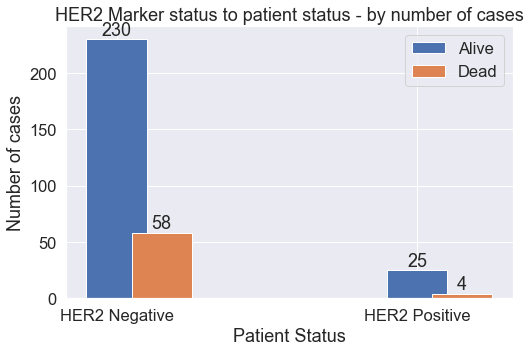

In [161]:
# now we plot the chart by number of cases
vari = ['HER2 Negative', 'HER2 Positive']
x = np.arange(len(vari))
cur_width = 0.2

fig, ax = plt.subplots(figsize = (8, 5))

pos_ax = ax.bar(x, alive_stat['Age'], width = cur_width, label = 'Alive')
neg_ax = ax.bar(x + width, dead_stat['Age'], width = cur_width, label = 'Dead')

ax.bar_label(pos_ax, padding = 0.3)
ax.bar_label(neg_ax, padding = 0.3)

ax.set_xticks(x)
ax.set_xticklabels(vari)
ax.set_yticks(np.arange(0,250,50))

plt.xlabel('Patient Status')
plt.ylabel('Number of cases')
plt.title('HER2 Marker status to patient status - by number of cases')
plt.legend()
plt.show()

We see above that a greater number of patients are **HER2 negative**, and out of them a large number are alive. By comparision, in **HER2 positive** cases, there appear to be a smaller number of living patients compared to the dead. However, in order to calculate whether mortality is truly greaer in HER2 positive patients than in HER2 negative patients, we need to find the ratio of dead to alive patients in HER2 positive patients and HER2 negative patients respectively. 

In [114]:
# we manually calculate the ratios of dead and alive patients to get the mortality. 

alive_stat['Ratio'] = 0
dead_stat['Ratio'] = 0

alive_stat.iloc[1,2] = alive_stat.iloc[1,1] / (alive_stat.iloc[1,1] + dead_stat.iloc[1,1])
dead_stat.iloc[1,2] = dead_stat.iloc[1,1] / (alive_stat.iloc[1,1] + dead_stat.iloc[1,1])
alive_stat.iloc[0,2] = alive_stat.iloc[0,1] / (alive_stat.iloc[0,1] + dead_stat.iloc[0,1])
dead_stat.iloc[0,2] = dead_stat.iloc[0,1] / (alive_stat.iloc[0,1] + dead_stat.iloc[0,1])

In [115]:
alive_stat

,HER2 status,Age,Ratio
0,Negative,230,0.798611
1,Positive,25,0.862069


In [116]:
dead_stat

,HER2 status,Age,Ratio
0,Negative,58,0.201389
1,Positive,4,0.137931


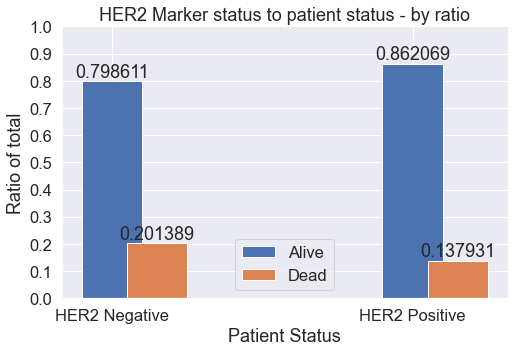

In [162]:
# and here we plot the scaled chart to reflect ratios 
vari = ['HER2 Negative', 'HER2 Positive']
x = np.arange(len(vari))
cur_width = 0.2

fig, ax = plt.subplots(figsize = (8, 5))

pos_ax = ax.bar(x, alive_stat['Ratio'], width = cur_width, label = 'Alive')
neg_ax = ax.bar(x + width, dead_stat['Ratio'], width = cur_width, label = 'Dead')

ax.bar_label(pos_ax, padding = 0.3)
ax.bar_label(neg_ax, padding = 0.3)

ax.set_xticks(x)
ax.set_xticklabels(vari)
ax.set_yticks(np.arange(0,1.1,0.1))

plt.xlabel('Patient Status')
plt.ylabel('Ratio of total')
plt.title('HER2 Marker status to patient status - by ratio')
plt.legend()
plt.show()

By this adjusted scale, we see that the actual mortality of **HER2 negative** patients is slightly **greater** than **HER2 positive** patients. 

## Mortality

Mortality is a health statistic that corresponds to the total number of deaths per unit time in a population divided by the population's number. Since our dataset gives us the patient's status (alive or dead), it would be interesting to calculate the mortality by different parameters for our dataset.

### Number of deaths each age range 

First we can take a look at the number of deaths in each age range. For this, weonce again need to transform the data before we can work with it.

In [118]:
# We get the patient statuses and ages by age ranges, and put the subsets of data into a dictionary

cancer_mort_raw = {}
key = 0
for i in range(len(bins)):
    if i < len(bins) - 1:
        row = BRC.loc[(BRC['Age'] >= bins[i]) & (BRC['Age'] < bins[i + 1])][['Patient_Status', 'Age']]
        if row.empty is False:
            cancer_mort_raw.update({'{} to {}'.format(bins[i], bins[i + 1]):row })
            key += 1
    else:
        pass

In [119]:
# we further clean the data, and rejoin the subsets into one dataframe

cancer_mort_list = []

for key, val in cancer_mort_raw.items():
    age_range = key
    status_df = val.groupby('Patient_Status', as_index = False).count()
    status_vals = {}
    
    for ps, a in zip(status_df['Patient_Status'], status_df['Age']):
        status_vals.update({'Age_range': age_range, ps: a})
        
    cancer_mort_list.append(status_vals)

In [120]:
cancer_mort = pd.DataFrame(cancer_mort_list)
cancer_mort.fillna(0, inplace = True)

In [121]:
cancer_mort.head()

,Age_range,Alive,Dead
0,25 to 30,1.0,1.0
1,30 to 35,0.0,1.0
2,35 to 40,11.0,1.0
3,40 to 45,20.0,3.0
4,45 to 50,33.0,11.0


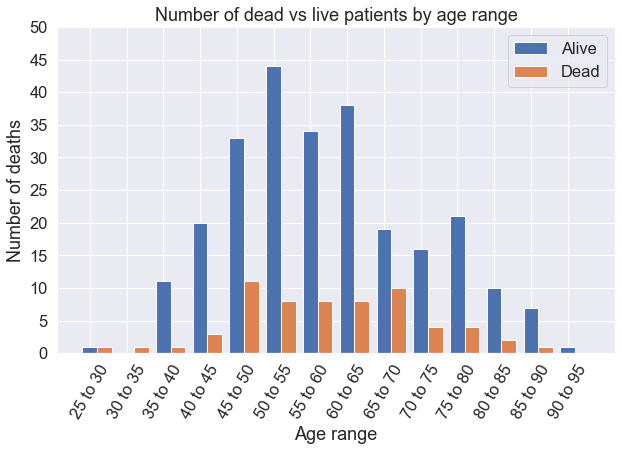

In [122]:
fig = plt.figure(figsize = (10,6))

age_range = list(cancer_mort['Age_range'])
x = np.arange(len(age_range))
width = 0.4

plt.bar(x, cancer_mort['Alive'], width = width, label = 'Alive')
plt.bar(x + width, cancer_mort['Dead'], width = width, label = 'Dead')
plt.xticks(x, rotation = 60, labels = age_range)
plt.yticks(np.arange(0, 55, 5))
plt.title('Number of dead vs live patients by age range')
plt.xlabel('Age range')
plt.ylabel('Number of deaths')

plt.legend()
plt.show()

From the above chart, we can see that deaths in all age ranges follow a normal distribution, same as the overall distribution of number of cases. We could try to get the percentages for each age range, but considering that we have an uneven number of patients in each range, our results could be deciphered incorrectly. 

### Mortality rate by cancer type

In [140]:
#We can see what the mortality is for each cancer type:
cancer_types = (
    BRC
    .groupby(['Histology', 'Patient_Status'], as_index = False)['Age']
    .count()
)


In [141]:
cancer_types.rename(columns = {'Age': 'Total'}, inplace = True)
cancer_types

,Histology,Patient_Status,Total
0,Infiltrating Ductal Carcinoma,Alive,179
1,Infiltrating Ductal Carcinoma,Dead,45
2,Infiltrating Lobular Carcinoma,Alive,67
3,Infiltrating Lobular Carcinoma,Dead,14
4,Mucinous Carcinoma,Alive,9
5,Mucinous Carcinoma,Dead,3


In [142]:
total_lesions = cancer_types['Total_Number'].sum()

ratios_by_type = []
ratios_by_total = []
for hist, pat_total in zip(cancer_types_total['Histology'], cancer_types_total['Total_Number']):
    results = cancer_types.loc[cancer_types['Histology'] == hist]
    
    for result in results['Total']:
        ratio_by_type = (result/pat_total)*100
        ratios_by_type.append(ratio_by_type)
        
        ratio_by_total = (result/total_lesions)*100
        ratios_by_total.append(ratio_by_total)

KeyError: 'Total_Number'

In [137]:
cancer_types['Ratio by cancer type (%)'] = ratios_by_type
cancer_types['Ratio by total (%)'] = ratios_by_total

NameError: name 'ratios_by_type' is not defined

In [127]:
cancer_types

,Histology,Patient_Status,Total,Ratio by cancer type (%),Ratio by total (%)
0,Infiltrating Ductal Carcinoma,Alive,179,79.910714,56.466877
1,Infiltrating Ductal Carcinoma,Dead,45,20.089286,14.195584
2,Infiltrating Lobular Carcinoma,Alive,67,82.716049,21.135647
3,Infiltrating Lobular Carcinoma,Dead,14,17.283951,4.416404
4,Mucinous Carcinoma,Alive,9,75.000000,2.839117
5,Mucinous Carcinoma,Dead,3,25.000000,0.946372


Above, we can see the no. of cases of each cancer type, the patient status, and the ratio of status by cancer type as well as total number of cases. 

In [128]:
cancer_types_alive = cancer_types.loc[cancer_types['Patient_Status'] == 'Alive'].copy()
cancer_types_dead = cancer_types.loc[cancer_types['Patient_Status'] == 'Dead'].copy()

In [129]:
cancer_types_alive.reset_index(inplace = True)
cancer_types_alive.drop('index', axis = 1, inplace = True)

cancer_types_dead.reset_index(inplace = True)
cancer_types_dead.drop('index', axis = 1, inplace = True)

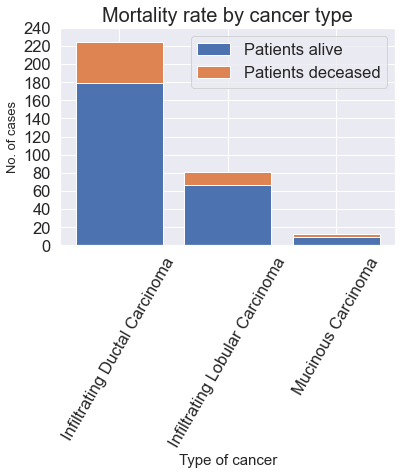

In [130]:
plt.bar(cancer_types_alive['Histology'], cancer_types_alive['Total'], label = 'Patients alive')
plt.bar(cancer_types_dead['Histology'], cancer_types_dead['Total'], bottom = cancer_types_alive['Total'], label = 'Patients deceased')

plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 250, 20))
plt.ylabel('No. of cases', fontdict={'fontsize': 13})
plt.xlabel('Type of cancer', fontdict={'fontsize': 15})
plt.title('Mortality rate by cancer type', fontdict={'fontsize': 20})
plt.legend()

plt.show()

Th above chart shows us the mortality rate by cancer type. However, due to the uneven number of samples of each cancer type, it is difficult to make just how lethal each type is in proportion to the number of samples. We use the ratios we calculated to get a more balanced picture:

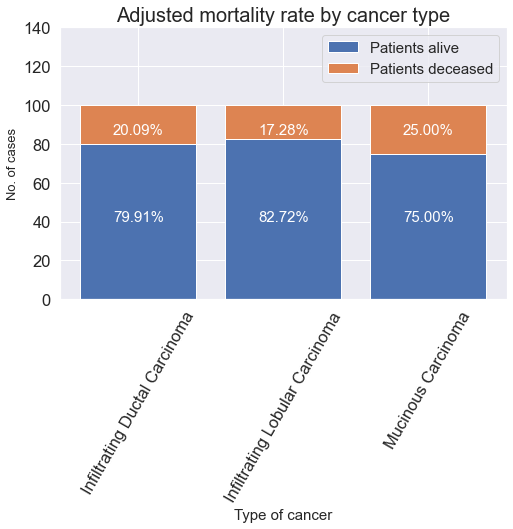

In [131]:
plt.figure(figsize = (8, 5))
counter = 0

plt.bar(cancer_types_alive['Histology'], cancer_types_alive['Ratio by cancer type (%)'], label = 'Patients alive')

for ind, value in zip(cancer_types_alive.index, cancer_types_alive['Ratio by cancer type (%)']):
    plt.text(ind, 40, '{:.2f}%'.format(value), horizontalalignment='center', fontdict={'fontsize': 15, 'color':'white'})

plt.bar(cancer_types_dead['Histology'], cancer_types_dead['Ratio by cancer type (%)'], bottom = cancer_types_alive['Ratio by cancer type (%)'], label = 'Patients deceased')

for ind, value in zip(cancer_types_dead.index, cancer_types_dead['Ratio by cancer type (%)']):
    plt.text(ind, 85, '{:.2f}%'.format(value), horizontalalignment='center', fontdict={'fontsize': 15, 'color':'white'})

plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 150, 20))
plt.ylabel('No. of cases', fontdict={'fontsize': 13})
plt.xlabel('Type of cancer', fontdict={'fontsize': 15})
plt.title('Adjusted mortality rate by cancer type', fontdict={'fontsize': 20})


plt.legend(prop = {'size': 15})

plt.show()

The adjusted mortality shows us that **each cancer has roughly the same mortality rate - around 20%**.

### Number of deaths by stage

In order to get a better idea of the mortality for each cancer type, we need to figure out the number of deaths in each stage. For this we shall once again transform the data:

In [164]:
# first we get the histological types 
cancer_stage_raw = {}
c_types = list(BRC['Histology'].unique())

for ty in c_types:
# for each type, we get the stages, patient statuses and ages
    row = BRC.loc[(BRC['Histology'] == ty)][['Tumour_Stage','Patient_Status', 'Age']]
    
# we put the resulting dataframes in a dictionary, with the type as the key
    cancer_stage_raw.update({'{}'.format(ty):row })

In [165]:
# we set the labels we want on the x-axis of the charts
labels = ['Alive', 'Dead']

In [166]:
# now we get the dataframes for each type of cancer

kidc, vidc = list(cancer_stage_raw.keys())[0], list(cancer_stage_raw.values())[0]
kmcc, vmcc = list(cancer_stage_raw.keys())[1], list(cancer_stage_raw.values())[1]
kilc, vilc = list(cancer_stage_raw.keys())[2], list(cancer_stage_raw.values())[2]

In the three cells below this, we filter the samples by stage into different datasets. This is so that constructing the bar chart would be easier in the end

In [167]:
# for Infiltrating Ductal Carcinoma

idc_i_i = vidc.loc[vidc['Tumour_Stage'] == 'I'][['Patient_Status', 'Age']]
idc_i_f = idc_i_i.groupby('Patient_Status', as_index = False).count()

idc_ii_i = vidc.loc[vidc['Tumour_Stage'] == 'II'][['Patient_Status', 'Age']]
idc_ii_f = idc_ii_i.groupby('Patient_Status', as_index = False).count()

idc_iii_i = vidc.loc[vidc['Tumour_Stage'] == 'III'][['Patient_Status', 'Age']]
idc_iii_f = idc_iii_i.groupby('Patient_Status', as_index = False).count()

In [168]:
# for Infiltrating Lobular Carcinoma

ilc_i_i = vilc.loc[vilc['Tumour_Stage'] == 'I'][['Patient_Status', 'Age']]
ilc_i_f = ilc_i_i.groupby('Patient_Status', as_index = False).count()

ilc_ii_i = vilc.loc[vilc['Tumour_Stage'] == 'II'][['Patient_Status', 'Age']]
ilc_ii_f = ilc_ii_i.groupby('Patient_Status', as_index = False).count()

ilc_iii_i = vilc.loc[vilc['Tumour_Stage'] == 'III'][['Patient_Status', 'Age']]
ilc_iii_f = ilc_iii_i.groupby('Patient_Status', as_index = False).count()

In [169]:
# for Mucinous Carcinoma

mcc_i_i = vmcc.loc[vmcc['Tumour_Stage'] == 'I'][['Patient_Status', 'Age']]
mcc_i_f = mcc_i_i.groupby('Patient_Status', as_index = False).count()

mcc_ii_i = vmcc.loc[vmcc['Tumour_Stage'] == 'II'][['Patient_Status', 'Age']]
mcc_ii_f = mcc_ii_i.groupby('Patient_Status', as_index = False).count()

mcc_iii_i = vmcc.loc[vmcc['Tumour_Stage'] == 'III'][['Patient_Status', 'Age']]
mcc_iii_f = mcc_iii_i.groupby('Patient_Status', as_index = False).count()

In [170]:
# the stage I chart of mucinous carcinoma needs to be appended because it doesn't have a 'Dead' column, which can affect our chart.

mcc_i_f = mcc_i_f.append({'Patient_Status':'Dead','Age':0}, ignore_index = True)

In [171]:
# now we get the percentages for the number of dead and alive patients in each dataset for a scaled comparision

idc_i_f['Percentage'] = (idc_i_f['Age']/idc_i_f['Age'].sum())*100
ilc_i_f['Percentage'] = (ilc_i_f['Age']/ilc_i_f['Age'].sum())*100
mcc_i_f['Percentage'] = (mcc_i_f['Age']/mcc_i_f['Age'].sum())*100

idc_ii_f['Percentage'] = (idc_ii_f['Age']/idc_ii_f['Age'].sum())*100
ilc_ii_f['Percentage'] = (ilc_ii_f['Age']/ilc_ii_f['Age'].sum())*100
mcc_ii_f['Percentage'] = (mcc_ii_f['Age']/mcc_ii_f['Age'].sum())*100

idc_iii_f['Percentage'] = (idc_iii_f['Age']/idc_iii_f['Age'].sum())*100
ilc_iii_f['Percentage'] = (ilc_iii_f['Age']/ilc_iii_f['Age'].sum())*100
mcc_iii_f['Percentage'] = (mcc_iii_f['Age']/mcc_iii_f['Age'].sum())*100

Finally we start constructing our charts:

In [172]:
# we get our xticks
x = np.arange(len(labels))
width = 0.15

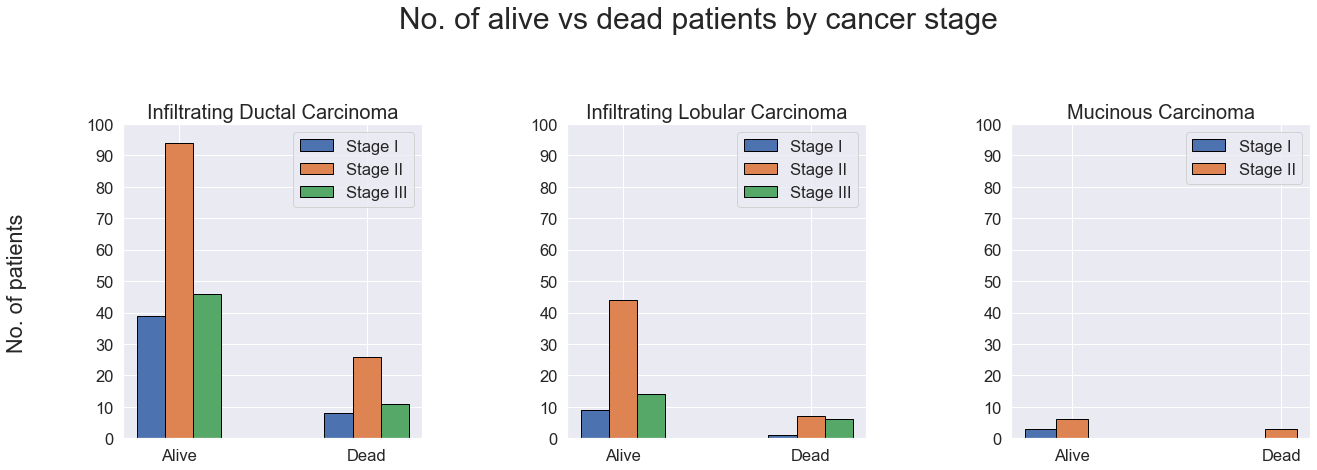

In [173]:
fig = plt.figure(figsize = (20,8))

fig1 = fig.add_subplot(1,3,1)
fig1.bar(x - width, idc_i_f['Age'], width = width, label = 'Stage I', edgecolor = 'black')
fig1.bar(x, idc_ii_f['Age'], width = width, label = 'Stage II', edgecolor = 'black')
fig1.bar(x + width, idc_iii_f['Age'], width = width, label = 'Stage III', edgecolor = 'black')
fig1.set_yticks(np.arange(0, 110,10))
fig1.set_xticks(x)
fig1.set_xticklabels(labels)
fig1.set_title('Infiltrating Ductal Carcinoma', fontdict = {'fontsize': 20})
fig1.legend()

fig2 = fig.add_subplot(1,3,2)
fig2.bar(x - width, ilc_i_f['Age'], width = width, label = 'Stage I', edgecolor = 'black')
fig2.bar(x, ilc_ii_f['Age'], width = width, label = 'Stage II', edgecolor = 'black')
fig2.bar(x + width, ilc_iii_f['Age'], width = width, label = 'Stage III', edgecolor = 'black')
fig2.set_yticks(np.arange(0, 110,10))
fig2.set_xticks(x)
fig2.set_xticklabels(labels)
fig2.set_title('Infiltrating Lobular Carcinoma', fontdict = {'fontsize': 20})
fig2.legend()

fig3 = fig.add_subplot(1,3,3)
fig3.bar(x - width, mcc_i_f['Age'], width = width, label = 'Stage I', edgecolor = 'black')
fig3.bar(x, mcc_ii_f['Age'], width = width, label = 'Stage II', edgecolor = 'black')
# there is no third bar for mucinous carcinoma since our dataset contains no samples having stage III mucinous carcinoma
fig3.set_yticks(np.arange(0, 110,10))
fig3.set_xticks(x)
fig3.set_xticklabels(labels)
fig3.set_title('Mucinous Carcinoma', fontdict = {'fontsize': 20})
fig3.legend()

fig.tight_layout(pad = 6)
fig.supylabel('No. of patients')
fig.suptitle('No. of alive vs dead patients by cancer stage', fontsize = 30)
plt.show()

We see here that the greatest number of deaths occur in Stage II of each type of cancer. However, the reason for this high number could be because we have a large number of Stage II samples; the numbers in the 'Alive' column follow a similar pattern to the ones in the 'Dead' column. To get a better idea of the relative mortality, we use the 'Percentage' column in our dataframes:

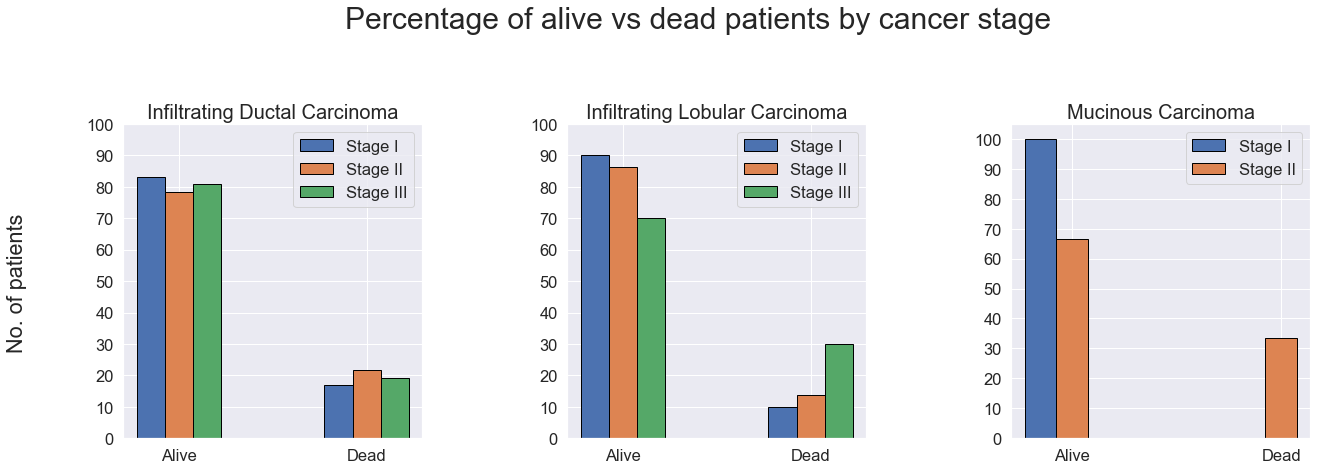

In [174]:
fig = plt.figure(figsize = (20,8))

fig1 = fig.add_subplot(1,3,1)
fig1.bar(x - width, idc_i_f['Percentage'], width = width, label = 'Stage I', edgecolor = 'black')
fig1.bar(x, idc_ii_f['Percentage'], width = width, label = 'Stage II', edgecolor = 'black')
fig1.bar(x + width, idc_iii_f['Percentage'], width = width, label = 'Stage III', edgecolor = 'black')
fig1.set_yticks(np.arange(0,110,10))
fig1.set_xticks(x)
fig1.set_xticklabels(labels)
fig1.set_title('Infiltrating Ductal Carcinoma', fontdict = {'fontsize': 20})
fig1.legend()

fig2 = fig.add_subplot(1,3,2)
fig2.bar(x - width, ilc_i_f['Percentage'], width = width, label = 'Stage I', edgecolor = 'black')
fig2.bar(x, ilc_ii_f['Percentage'], width = width, label = 'Stage II', edgecolor = 'black')
fig2.bar(x + width, ilc_iii_f['Percentage'], width = width, label = 'Stage III', edgecolor = 'black')
fig2.set_yticks(np.arange(0,110,10))
fig2.set_xticks(x)
fig2.set_xticklabels(labels)
fig2.set_title('Infiltrating Lobular Carcinoma', fontdict = {'fontsize': 20})
fig2.legend()

fig3 = fig.add_subplot(1,3,3)
fig3.bar(x - width, mcc_i_f['Percentage'], width = width, label = 'Stage I', edgecolor = 'black')
fig3.bar(x, mcc_ii_f['Percentage'], width = width, label = 'Stage II', edgecolor = 'black')
# there is no third bar for mucinous carcinoma since our dataset contains no samples having stage III mucinous carcinoma
fig3.set_yticks(np.arange(0,110,10))
fig3.set_xticks(x)
fig3.set_xticklabels(labels)
fig3.set_title('Mucinous Carcinoma', fontdict = {'fontsize': 20})
fig3.legend()

fig.tight_layout(pad = 6)
fig.supylabel('No. of patients')
fig.suptitle('Percentage of alive vs dead patients by cancer stage', fontsize = 30)
plt.show()

Now we can make the following observations:
    
- For **Infiltrating Ductal Carcinoma**, all three stages appear to have an equal mortality rate, hovering at around **20%**.
- For **Infiltrating Lobular Carcinoma**, **Stage I** has a mortality rate of around **10%**, rising slightly to around **12%** in **Stage II**. In **Stage III** however, it jumps to around **30%**.
- For **Mucinous Carcinoma**, it is difficult to make any real observations due to the scarcity of data. However, it appears that the mortality rate of **Stage II** is at least **30%** higher than that of **Stage I**.

## Conclusions

### Acheivements

We started this analysis with the intention of seeing any trends or correlation between the different attributes in breast cancer patients. After our analysis, we see the following trends:
- Male cancer patients make up a little more than 1% of all breast cancer patients in the dataset.
- 40% or more patients having breast cancer fall in the age range of 40-65. For Infiltrating Ductal Carcinoma the numbers rise fairly sharply, but for Infiltrating Lobular and Mucinous Carcinoma the curve is more gradual.
- A majority of patients having breast cancer have the Infiltrating Ductal variety. 
- For both Infiltrating Ductal and Lobular Carcinomas, most patients present in the II and III stages.
- The number of patients having Mucinous Carcinoma are the fewest in the entire dataset; there are no patients having Stage III Mucinous Carcinoma in the dataset. 
- Marker proteins, which are a special kind of protein that serve as markers for cancer, have no particular association with age, type or stage of cancer. 
- ER and PR receptors are all positive for every patient in the dataset. 
- There are both HER2 positive and HER2 negative patients in the dataset.
- The mortality of HER2 positive patients is at 13.79% for our dataset, while the mortality of HER2 negative patients is slightly higher at 20.14%.
- In keeping with the general distribution of the data, the mortality by age range is highest between ages 45-70.
- The mortality rates by cancer types all hover around twenty percent. 
- For Infiltrating Ductal Carcinoma, the overall mortality is 20.09%; in Stage I it is 17.02%, in Stage II, it is 21.67%, and in Stage III, it is 19.30%.)
- For Infiltrating Lobular Carcinoma, the overall mortality is 17.28%; in Stage I the mortality is 10.0%, in Stage II it is 13.73%, and in Stage III it is 30%.
- For Mucinous Carcinoma, the overall mortality is 25.00%; in Stage I it is 0.0%, in Stage II it is 33.33%, and in Stage III it is 0.0%.
- All percentages derived from total number of patients in the given stage of that particular cancer.
- With only our dataset as the training and testing model, our regressor model was able to predict the survival of the patients with a mean square error of 0.33.




# **Data Prediction**

In [143]:
data = BRC.copy()
data = data.dropna()
data = data.drop([data.columns[i] for i in range(8,15)], axis=1)
data = data.drop('Patient_ID', axis=1)

# **Data preprocessing**

In [144]:
le = LabelEncoder()
# Transform categorical data
data['Patient_Status'] = le.fit_transform(data['Patient_Status']) 
data['Gender'] = le.fit_transform(data['Gender'].astype(str))
X,Y = data.iloc[:,:-1], data.iloc[:,-1] # Extract features and labels
X_dummies = X.copy() # Copy of the features with "dummied" categorical data for one kind of feature
X_dummies = pd.get_dummies(X_dummies, prefix=['Tumour_Stage']) # Get dummies for a categorical data
X['Tumour_Stage'] = le.fit_transform(X['Tumour_Stage'].astype(str)) # Transform categorical data
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.151, random_state=42)
X_dummies_train, X_dummies_test, Y_dummies_train, Y_dummies_test = train_test_split(X_dummies, Y, test_size=0.151, random_state=42)

# **Training the model**

In [145]:
## Train models
log_reg = LogisticRegression(max_iter = 7777)
log_reg.fit(X_train, Y_train)
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

## Train models with dummies
log_reg_dummies = LogisticRegression(max_iter = 7777)
log_reg_dummies.fit(X_dummies_train, Y_dummies_train)
tree_dummies = DecisionTreeClassifier()
tree_dummies.fit(X_dummies_train, Y_dummies_train)

DecisionTreeClassifier()

# **Evaluate the models**

In [146]:
## Evalueate models
log_reg_acc = 100*log_reg.score(X_test, Y_test)
tree_acc = 100*tree.score(X_test, Y_test)
log_reg_acc_dummies = 100*log_reg_dummies.score(X_dummies_test, Y_dummies_test)
tree_acc_dummies = 100*tree_dummies.score(X_dummies_test, Y_dummies_test)

print("Logistic Regression: {:.4f}%".format(log_reg_acc))
print("Decision Tree Classifier: {:.4f}%".format(tree_acc))
print("Logistic Regression with dummies: {:.4f}%".format(log_reg_acc_dummies))
print("Decision Tree Classifier with dummies: {:.4f}%".format(tree_acc_dummies))

Logistic Regression: 83.3333%
Decision Tree Classifier: 70.8333%
Logistic Regression with dummies: 83.3333%
Decision Tree Classifier with dummies: 75.0000%


### Limitations


### Future Work

In keeping with the findings of this analysis, I would like to research further on male patients having breast cancer, and a greater number of patients having the rarer types of breast cancers. Also, a larger number of patients from the extremes of age ranges could be taken into consideration, so as to check if they present an 'atypical' picture of breast cancer. Regressor models would need to be run upon atypical patients so as to maximize predictive capabilities of the model.